<a href="https://colab.research.google.com/github/Nic-py/load-shortfall-regression-predict-api/blob/master/Main_Model_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Nichodemus Amollo**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

The process begins with loading libraries that will aid in data loading, manipulation, forecasting, visualisation, preparation and model building.

In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # for mathematical function
import pandas as pd # for data analysis and manipulation
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
import pickle


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

##### Let us load and have a look at the data files for Spain Electricity Shortfall given. The data files are in csv format hence the '.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#load the data
df_train = pd.read_csv('/content/gdrive/MyDrive/predict/df_train.csv', index_col = 0)
df_test = pd.read_csv('/content/gdrive/MyDrive/predict/df_test.csv',index_col = 0)

#to have a copy of our dataframes
df_test_copy = df_test.copy()
df_train_copy =df_train.copy()
df_train.head()

time  Madrid_wind_speed  ... Madrid_temp_min  load_shortfall_3h
0  2015-01-01 03:00:00           0.666667  ...      265.938000        6715.666667
1  2015-01-01 06:00:00           0.333333  ...      266.386667        4171.666667
2  2015-01-01 09:00:00           1.000000  ...      272.708667        4274.666667
3  2015-01-01 12:00:00           1.000000  ...      281.895219        5075.666667
4  2015-01-01 15:00:00           1.000000  ...      280.678437        6620.666667

[5 rows x 48 columns]

The pd.read csv method of the Dataframe is used to load data from text files. df train.head() gives us a quick glimpse of the dataframe's first five rows. We can see the names of the columns as well as the values within them.
NB: Our target/label variable is load shortfall 3h.



##### We would also be interested to know how many records we have in the dataframe

In [ ]:
print('train: ', df_train.shape)

print('test: ', df_test.shape)

train:  (8763, 48)
test:  (2920, 47)


Our train dataset has 8763 rows and 48 columns(the target variable inclusive) while our test set has 2920 rows with 47 columns. Here the test set has features for predicting our target variable




##### Now that we have an overview of how our data looks like, we can proceed to performing some Exploratory Data Analysis

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


##### Using the dataframe.info method, we'll check for null values, column value counts, and different datatypes of columns in our data frame. When it comes to cleaning, knowing where to start is crucial.

In [ ]:
#check null value

df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

Except for time, Valencia wind deg, and Seville pressure, most of our columns are of the Float64 data type.
The objects dtype- Valencia wind deg and Seville pressure are categorical. The time should be formatted as datetime.

It's worth noting that Valencia pressure is the only column with incomplete data.

##### We will set our time variable as datetime and our object variables as category so as to have the correct format of our data types

In [ ]:
df_test['time'] = pd.to_datetime(df_test['time'])

#have a copy of our test_data with the correct dtype for our time column
df_test_copy = df_test.copy()

In [ ]:
df_train['time'] = pd.to_datetime(df_train['time'])

#have a copy of our train_data with the correct dtype for our time column
df_train_copy = df_train.copy()

In [ ]:
for col in ['Valencia_wind_deg', 'Seville_pressure']:
    df_train[col] = df_train[col].astype('category')

#have a copy of our train_data with the correct  dtype for our categorical columns
df_train_copy = df_train.copy()


In [ ]:
for col in ['Valencia_wind_deg', 'Seville_pressure']:
    df_test[col] = df_test[col].astype('category')
    

#have a copy of our train_data with the correct  dtype for our categorical columns
df_test_copy = df_test.copy()

... It was necessary to perform the above for making it easier to further explore our data well

##### We are ready to start our exploratory data analysis of the data.
For the numeric features as well as the load shortfall 3h label column, we can utilize the dataframe's describe method to exame the five number summary statistics, that being the count, mean, standard deviation, minimum, percentiles and Maximum.

In [ ]:
# look at data statistics
df_train.describe().T

count          mean  ...           75%           max
Madrid_wind_speed     8763.0      2.425729  ...      3.333333  1.300000e+01
Bilbao_rain_1h        8763.0      0.135753  ...      0.100000  3.000000e+00
Valencia_wind_speed   8763.0      2.586272  ...      3.666667  5.200000e+01
Seville_humidity      8763.0     62.658793  ...     82.000000  1.000000e+02
Madrid_humidity       8763.0     57.414717  ...     78.666667  1.000000e+02
Bilbao_clouds_all     8763.0     43.469132  ...     75.000000  1.000000e+02
Bilbao_wind_speed     8763.0      1.850356  ...      2.666667  1.266667e+01
Seville_clouds_all    8763.0     13.714748  ...     20.000000  9.733333e+01
Bilbao_wind_deg       8763.0    158.957511  ...    234.000000  3.593333e+02
Barcelona_wind_speed  8763.0      2.870497  ...      4.000000  1.266667e+01
Barcelona_wind_deg    8763.0    190.544848  ...    260.000000  3.600000e+02
Madrid_clouds_all     8763.0     19.473392  ...     33.333333  1.000000e+02
Seville_wind_speed    8763.0      2.425045  ...      3.333333  1.166667e+01
Barcelona_rain_1h     8763.0      0.128906  ...      0.000000  1.200000e+01
Seville_rain_1h       8763.0      0.039439  ...      0.000000  3.000000e+00
Bilbao_snow_3h        8763.0      0.031912  ...      0.000000  2.130000e+01
Barcelona_pressure    8763.0   1377.964605  ...   1022.000000  1.001411e+06
Seville_rain_3h       8763.0      0.000243  ...      0.000000  9.333333e-02
Madrid_rain_1h        8763.0      0.037818  ...      0.000000  3.000000e+00
Barcelona_rain_3h     8763.0      0.000439  ...      0.000000  9.300000e-02
Valencia_snow_3h      8763.0      0.000205  ...      0.000000  7.916667e-01
Madrid_weather_id     8763.0    773.527594  ...    800.666667  8.040000e+02
Barcelona_weather_id  8763.0    765.979687  ...    801.000000  8.040000e+02
Bilbao_pressure       8763.0   1017.739549  ...   1024.000000  1.042000e+03
Seville_weather_id    8763.0    774.658818  ...    800.000000  8.040000e+02
Valencia_pressure     6695.0   1012.051407  ...   1018.000000  1.021667e+03
Seville_temp_max      8763.0    297.479527  ...    304.150000  3.204833e+02
Madrid_pressure       8763.0   1010.316920  ...   1022.000000  1.038000e+03
Valencia_temp_max     8763.0    291.337233  ...    297.248333  3.142633e+02
Valencia_temp         8763.0    290.592152  ...    296.056667  3.104267e+02
Bilbao_weather_id     8763.0    724.722362  ...    801.666667  8.040000e+02
Seville_temp          8763.0    293.978903  ...    299.620333  3.149767e+02
Valencia_humidity     8763.0     65.247727  ...     81.333333  1.000000e+02
Valencia_temp_min     8763.0    289.867648  ...    294.820000  3.102720e+02
Barcelona_temp_max    8763.0    291.157644  ...    296.855000  3.140767e+02
Madrid_temp_max       8763.0    289.540309  ...    296.816667  3.144833e+02
Barcelona_temp        8763.0    289.855459  ...    294.909000  3.073167e+02
Bilbao_temp_min       8763.0    285.017973  ...    289.816667  3.098167e+02
Bilbao_temp           8763.0    286.422929  ...    291.034167  3.107100e+02
Barcelona_temp_min    8763.0    288.447422  ...    292.966667  3.048167e+02
Bilbao_temp_max       8763.0    287.966027  ...    292.483333  3.179667e+02
Seville_temp_min      8763.0    291.633356  ...    297.150000  3.148167e+02
Madrid_temp           8763.0    288.419439  ...    295.154667  3.131333e+02
Madrid_temp_min       8763.0    287.202203  ...    293.884500  3.103833e+02
load_shortfall_3h     8763.0  10673.857612  ...  14498.166667  3.190400e+04

[45 rows x 8 columns]

The statistics reveal some important information about the distribution of the data in each of the numeric fields, including the number of observations (there are 8763 records except for Valencia_pressure), the mean, standard deviation, minimum and maximum values, and the quartile values . From this, we can see that the mean number of load_shortfall_3h is around 10673 with a very high std; The minimum values of all numerical columns are greater than or equal to zero except for the target column. This shows that predictive variables accept positive values.

We can also see that there is a wide gap between the mean and the maxiumum values indicating that the data has some outliers. the data will therfore be standardized and the ouliers removed. 

The negative value means the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc.,in that time was less than the energy generated with fossil fuels.



##### we check for skewness (how symmetrical our features are)
skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean


In [ ]:
df_train.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

Features greater than 1 are highly positively skewed eg Valencia_snow_3h; features less than -1 are highly negativiley skewed eg Seville_weather_id we also have feautures that are moderately skewed to the left and to the right and which are fairly symmetrical eg Bilbao_temp(-0.5<x<0.5 are fairly symmetrical)

##### Kurtosis is the measure of outliers present in the data. High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers.

In [ ]:
df_train.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

Some of our features have very large number of outliers with Valencia_snow_3h taking the lead

# VISUALIZATION

##### We might get a clearer idea of the distribution of load_shortfall_3h values by visualizing the data. 



We might get a clearer idea of the distribution of load_shortfall_3h values by visualizing the data. Common plot types for visualizing numeric data distributions are histograms and box plots, so let's use Python's matplotlib library to create one of each of these for the load_shortfall_3h column.

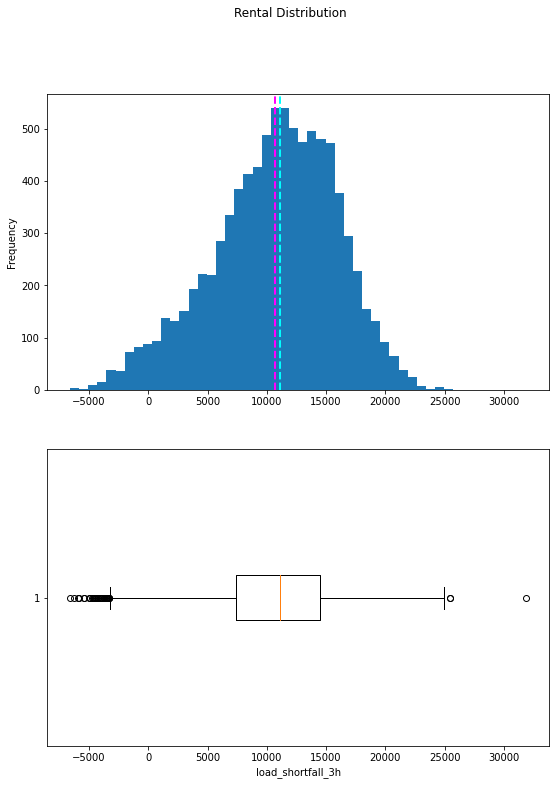

In [ ]:
# Get the label column
label = df_train['load_shortfall_3h']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=50)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('load_shortfall_3h')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()


The plots show that the number of load_shortfall_3h ranges from -5000 to just over 30,000. However, the mean (and median) number of load_shortfall_3h is slightly in the middle The few values above this are shown in the box plot as small circles, indicating that they are outliers - in other words, unusually high or low values beyond the typical range of most of the data.
Beacuse our dataset contain values that are far from the mean, we will standardize the data during the data engineering phase to bring down all the features to a common scale without distorting the differences in the range of the values.



We can also have a look at the distribution of load_shortfall throughout the period as a time series

Text(0, 0.5, 'load_shortfall_3h')

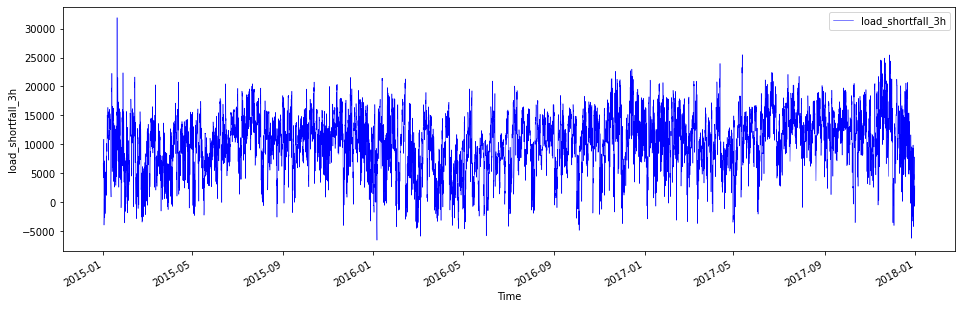

In [ ]:
# Draw a scatter plot
fig = plt.rcParams['figure.figsize']=(16, 5)
df_train.plot("time", "load_shortfall_3h", color='blue', linewidth = 0.5,
         markerfacecolor='blue', markersize=12)
plt.xlabel('Time')
plt.ylabel('load_shortfall_3h')

There is a trend of load_shortfall_3h during different seasons of the year. Like at the beginning of the year we have negative values of load_shortfall_3h. However, this is not clearly shown and you will have to create graphs to look at the pattern from a granular lever during feature engineering after creating features like hour of day, day of week, month of the year etc

##### We can do the same kind of visual exploration of the numeric features. Let's create a histogram for each of these.

In [ ]:
#drop the categorical features and the target feature
numeric_features = df_train.drop(['Seville_pressure','Valencia_wind_deg', 'time', 'load_shortfall_3h'], axis=1)


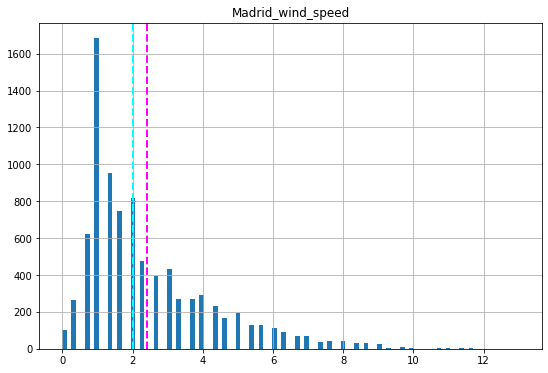

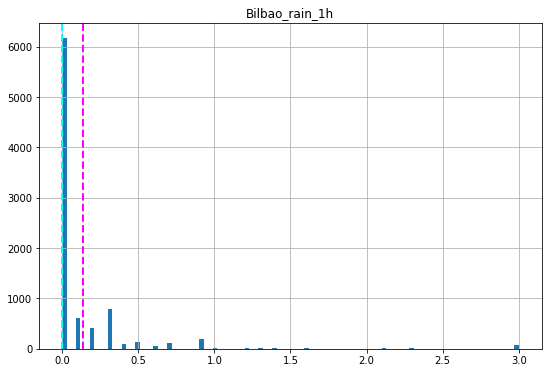

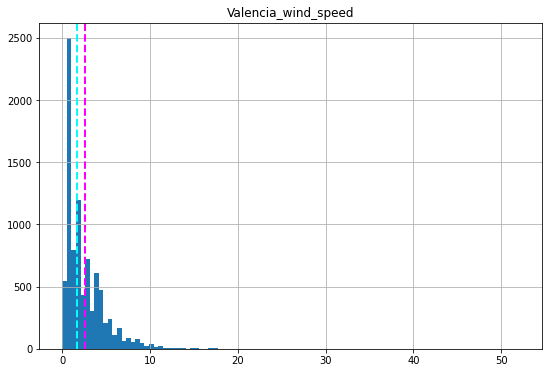

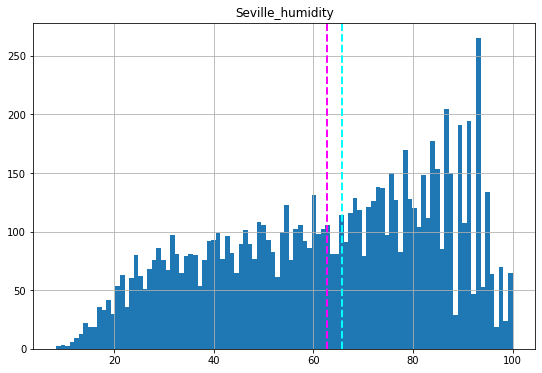

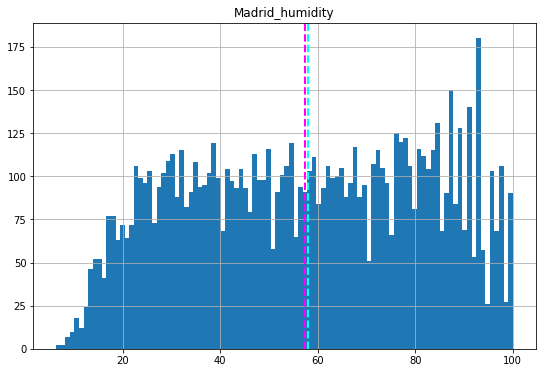

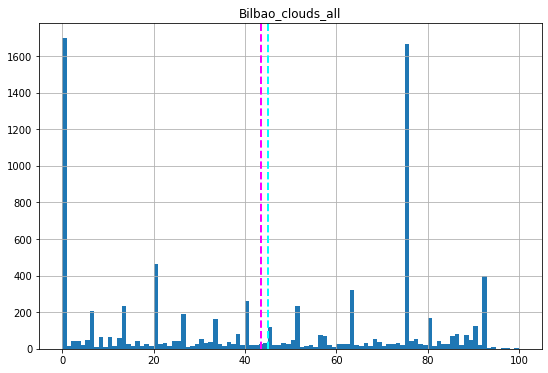

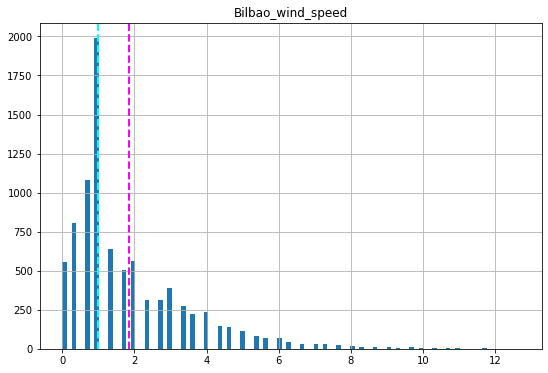

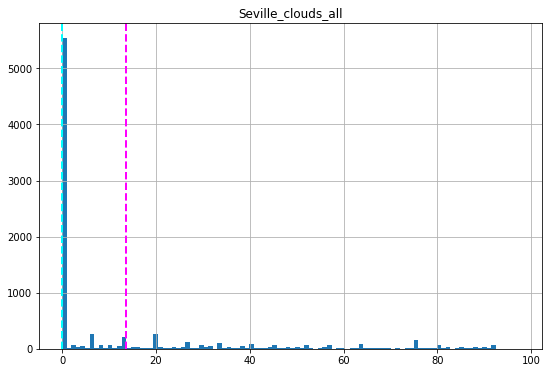

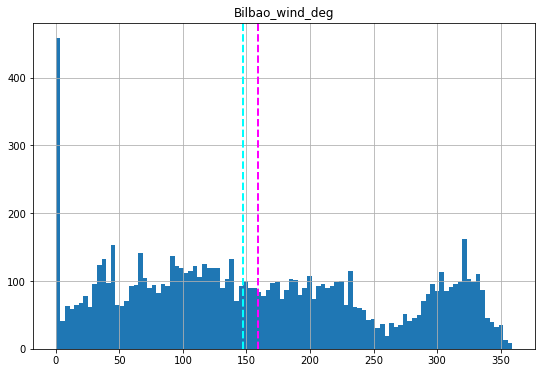

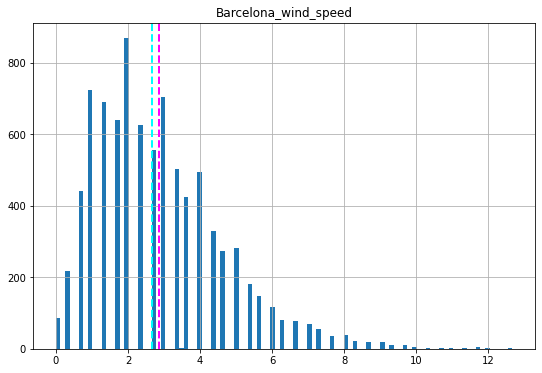

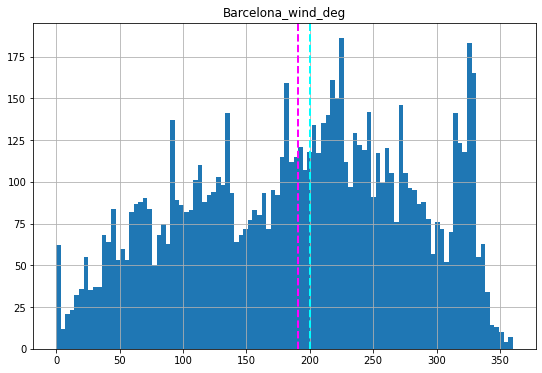

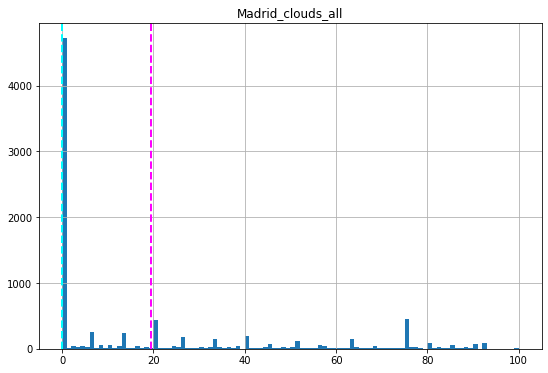

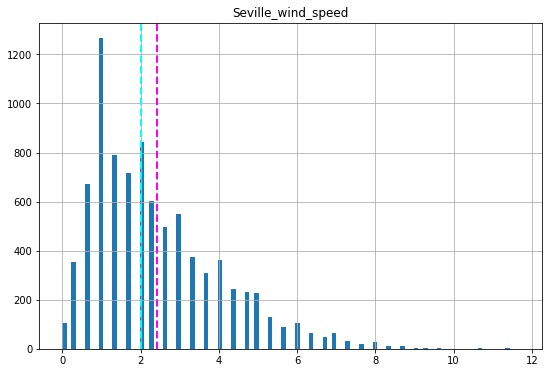

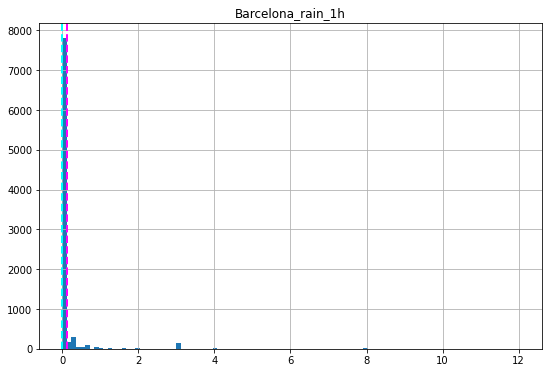

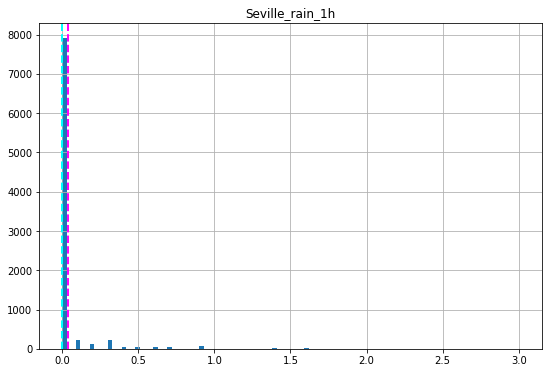

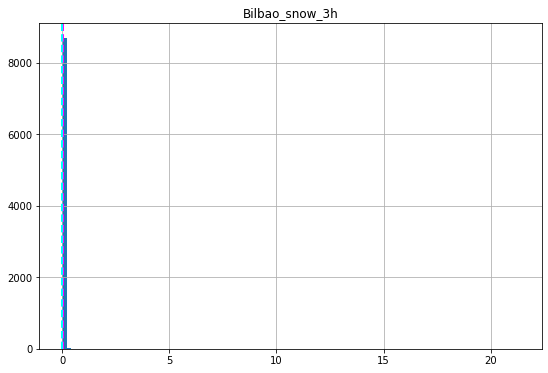

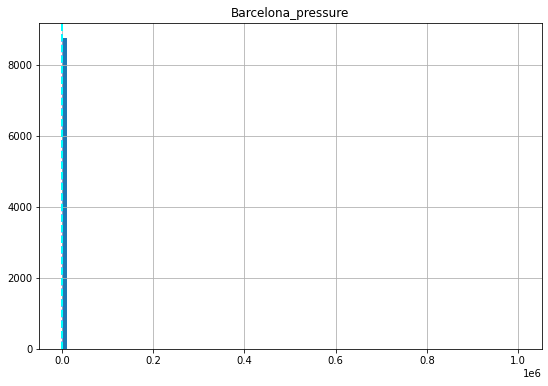

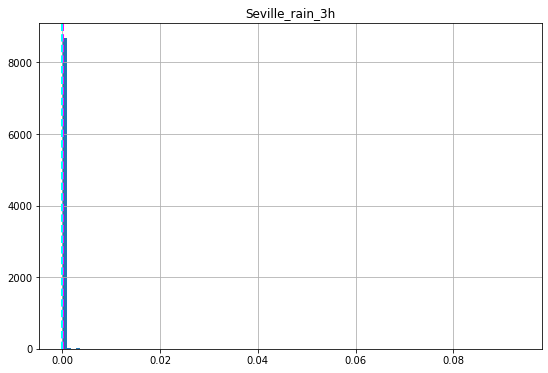

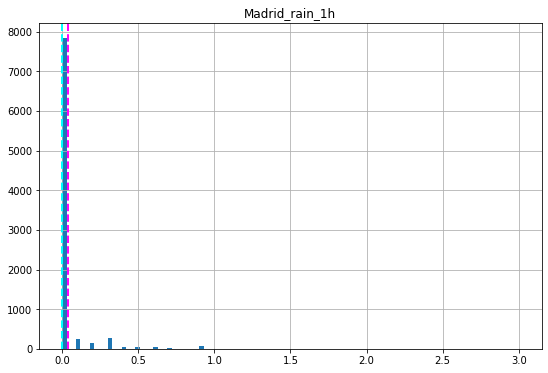

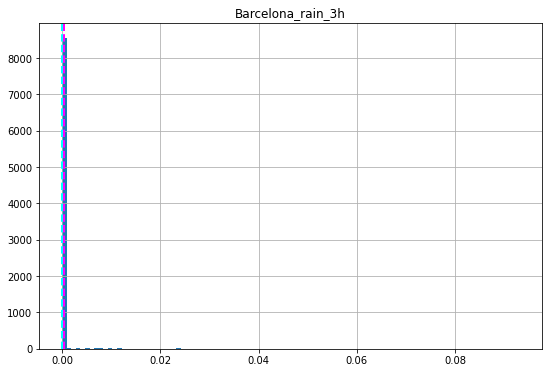

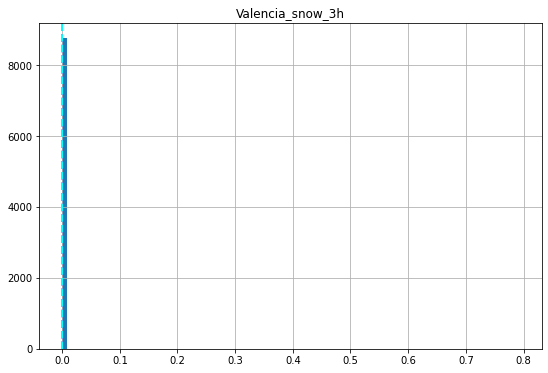

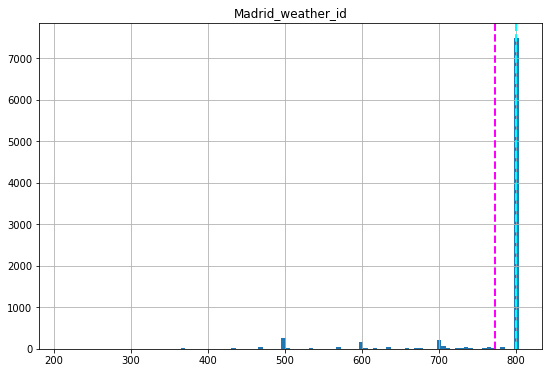

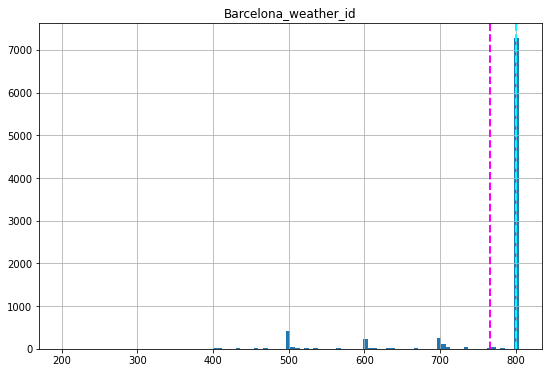

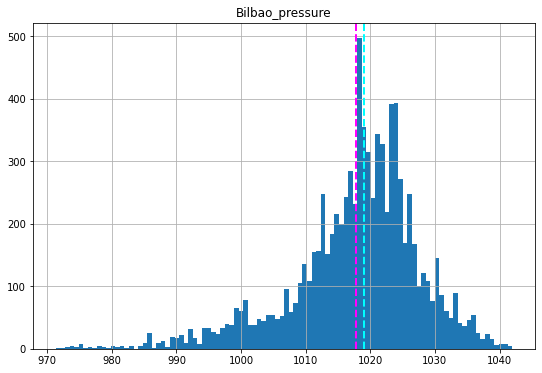

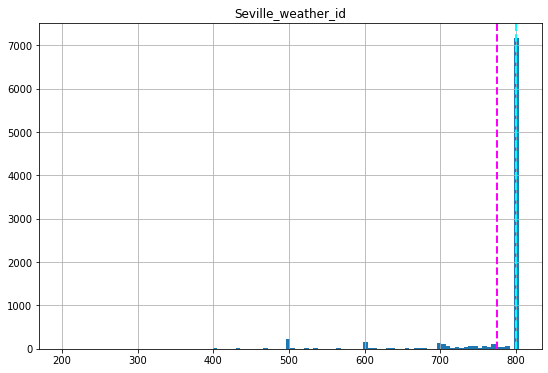

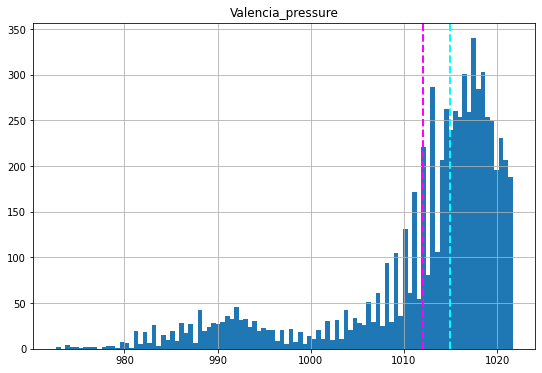

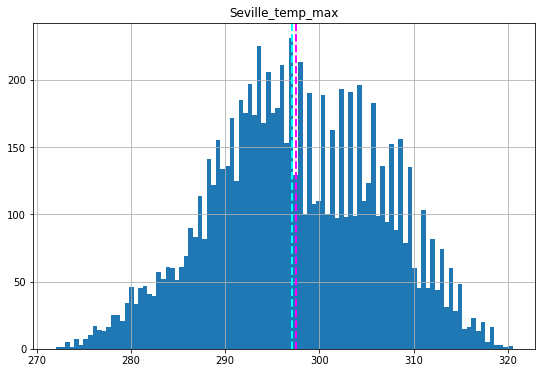

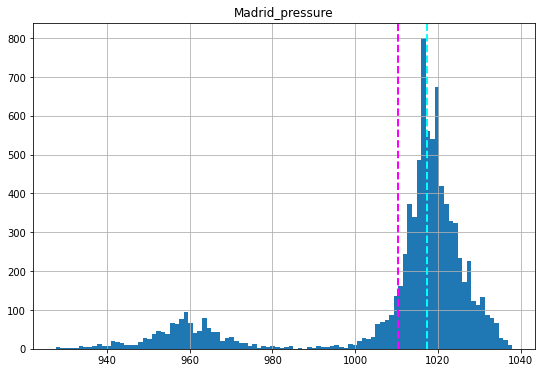

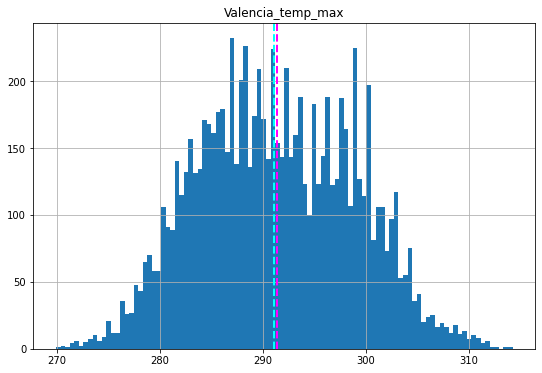

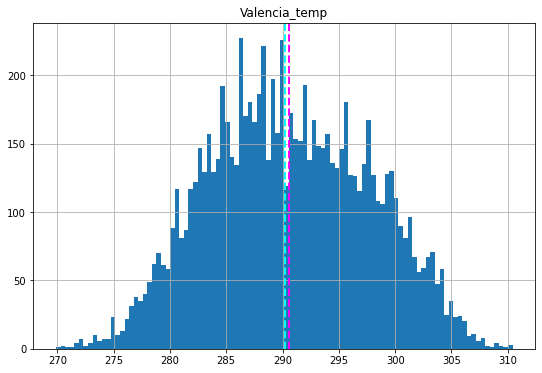

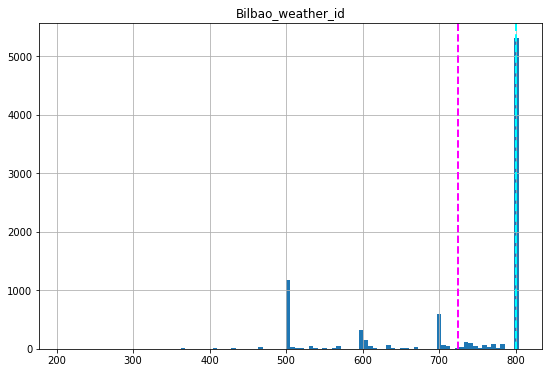

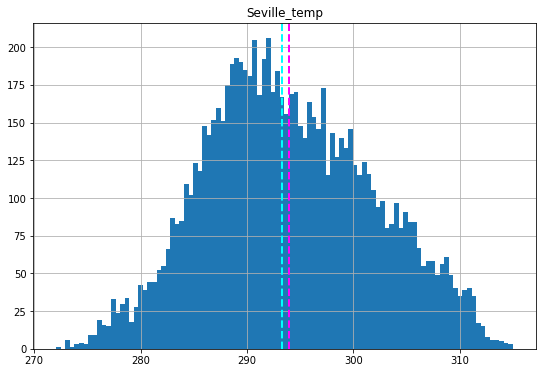

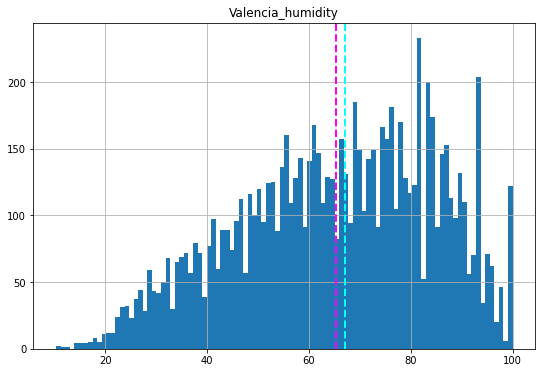

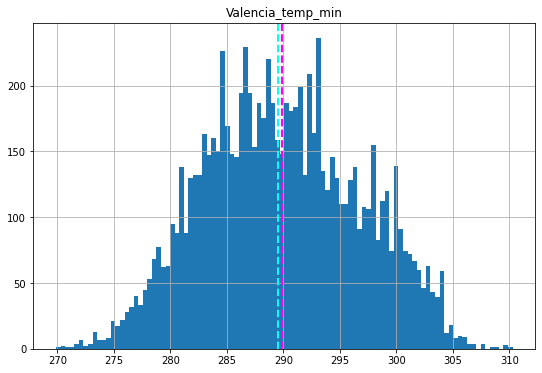

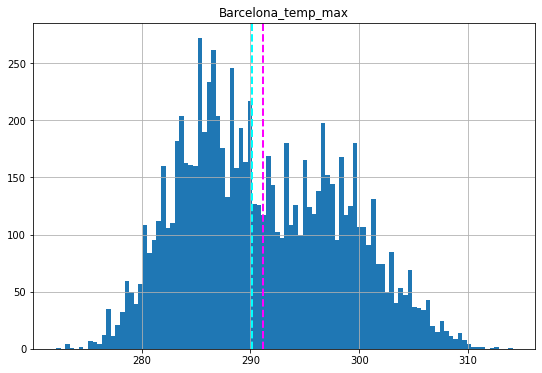

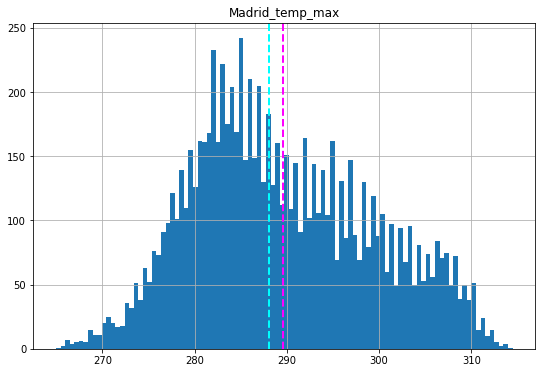

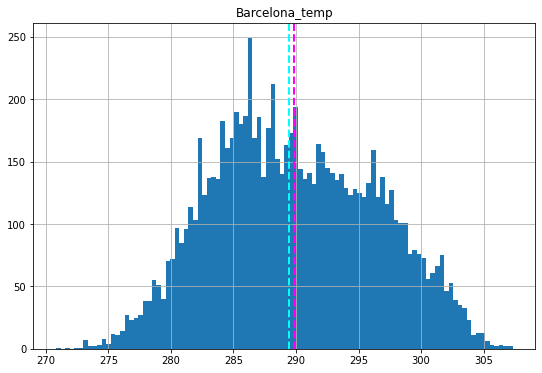

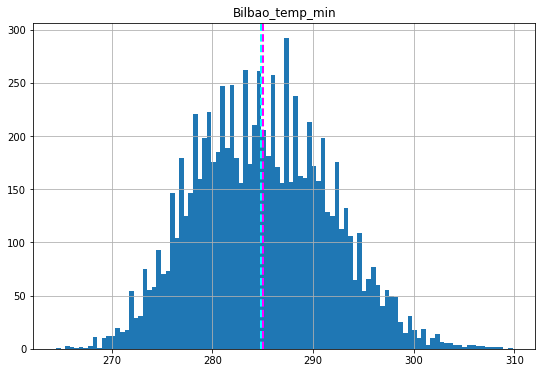

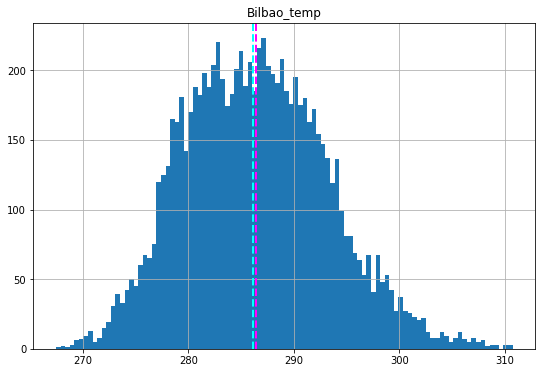

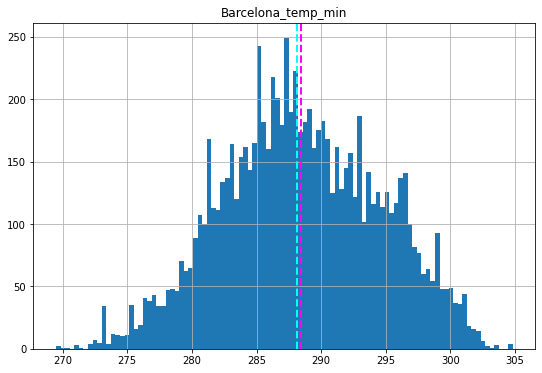

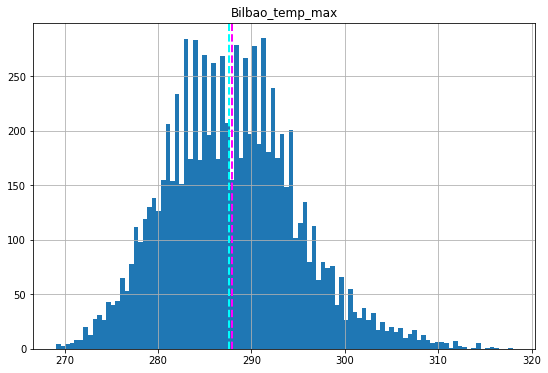

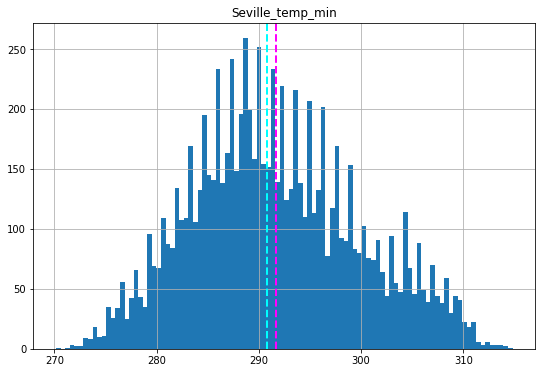

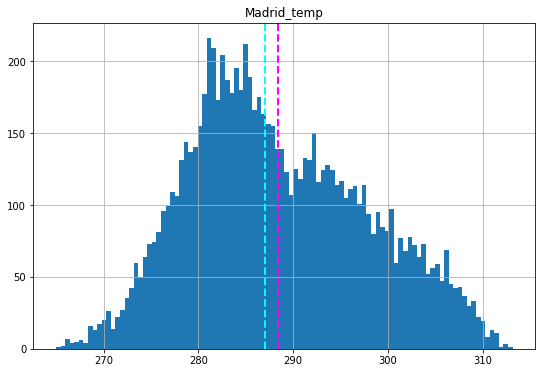

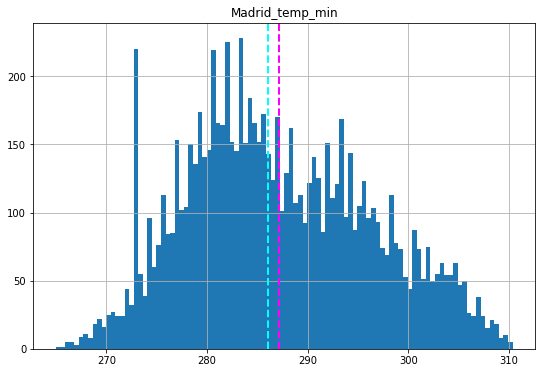

In [ ]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_train[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Most of the features are either left skewed or right skewed. and since the features are not normally distributed, this calls for standardiztion of our df_train set

##### We can also create scatter plots that show the intersection of feature and label values for the numeric features. We can also calculate the correlation statistic to quantify the apparent relationship..

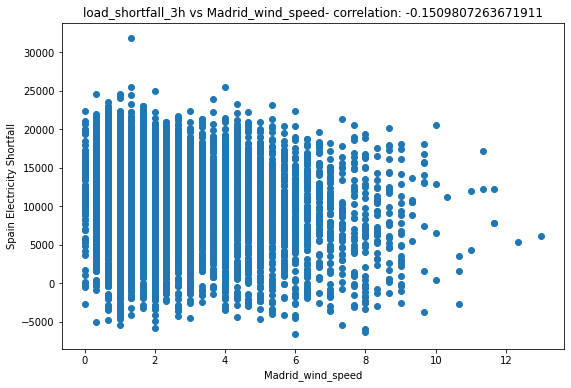

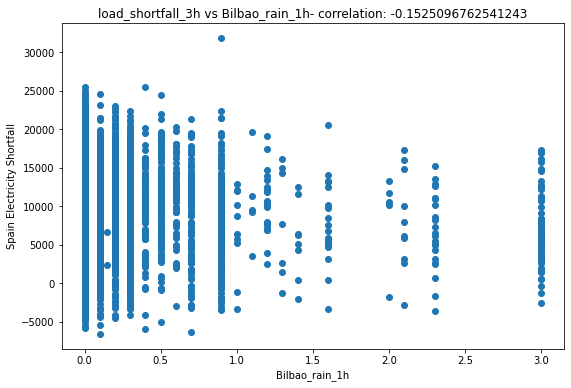

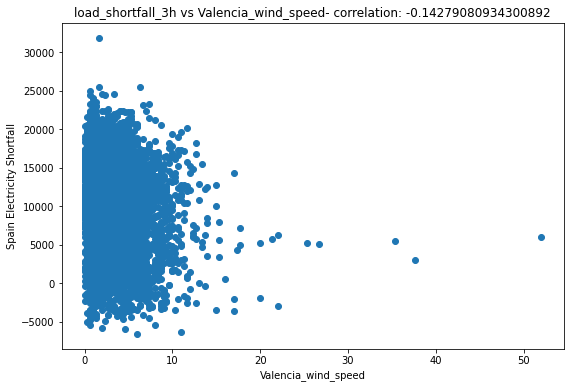

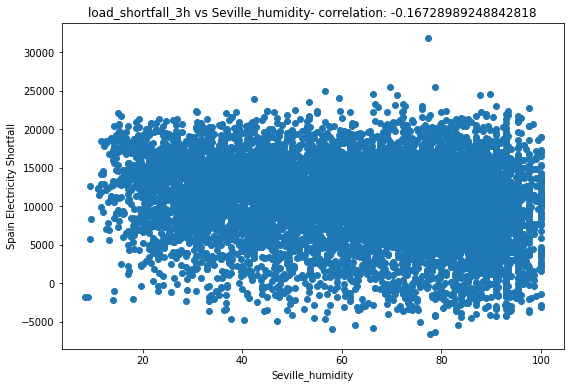

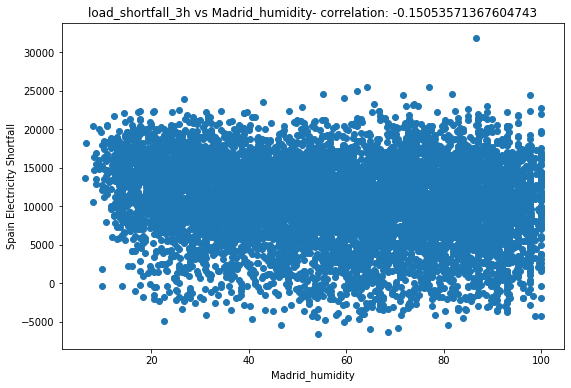

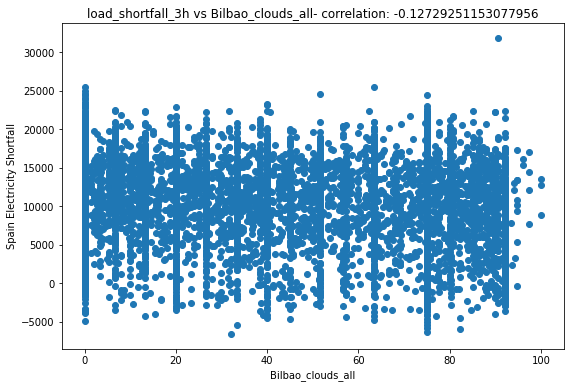

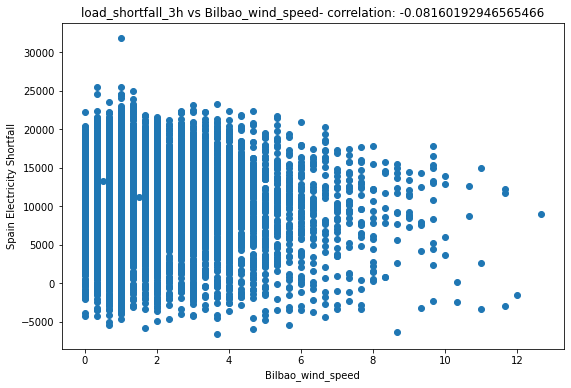

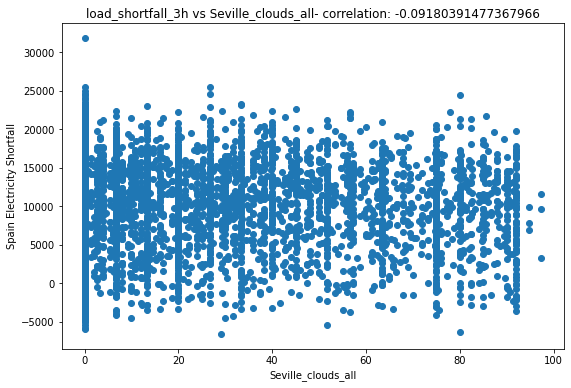

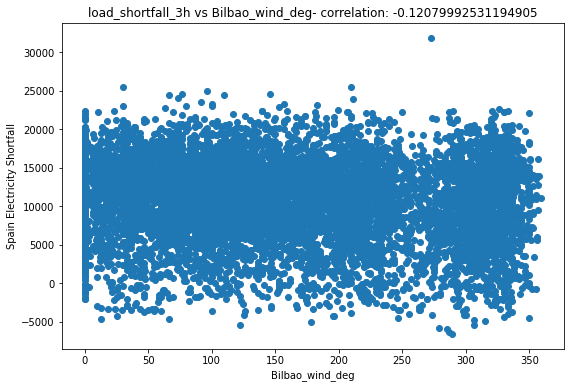

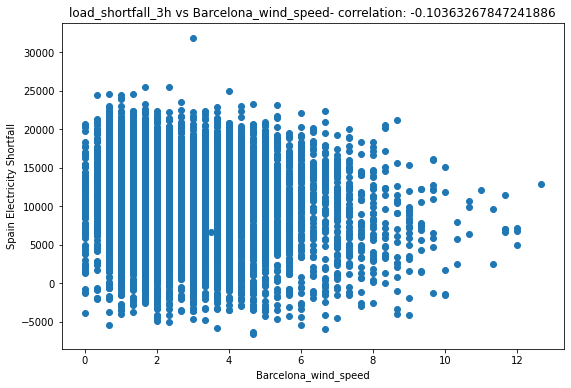

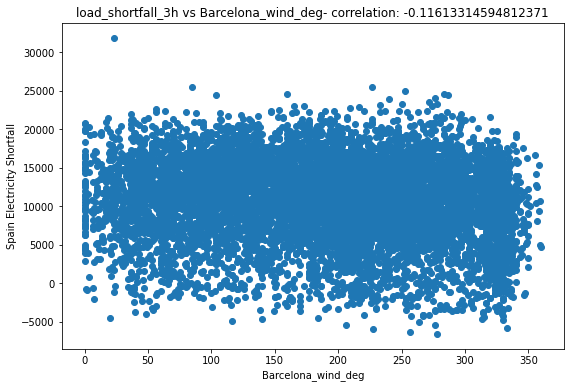

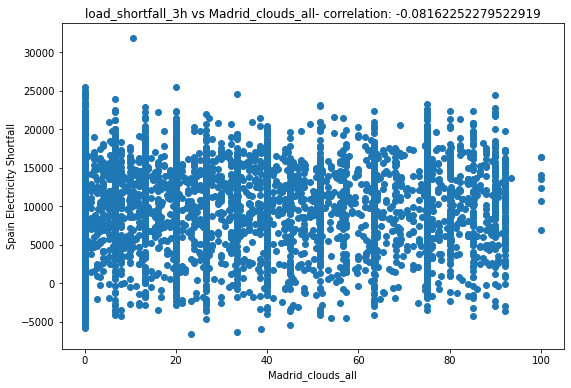

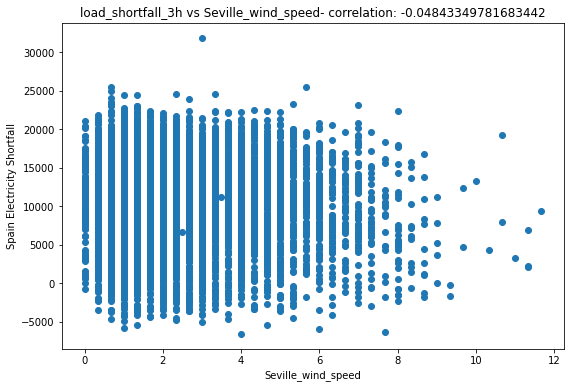

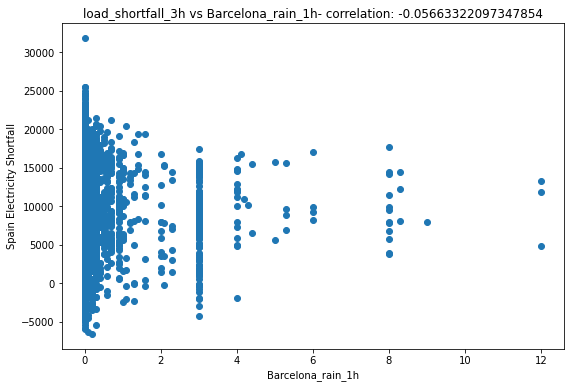

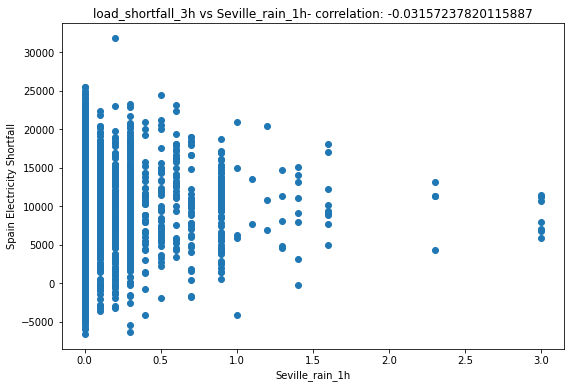

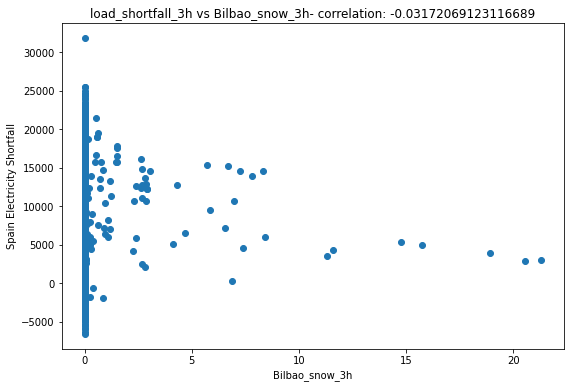

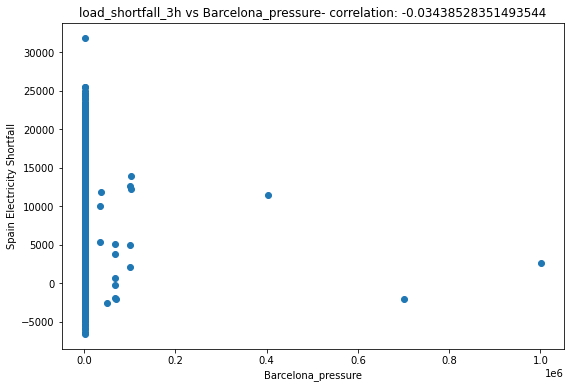

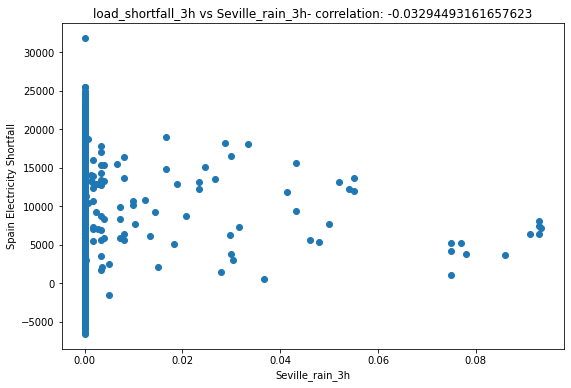

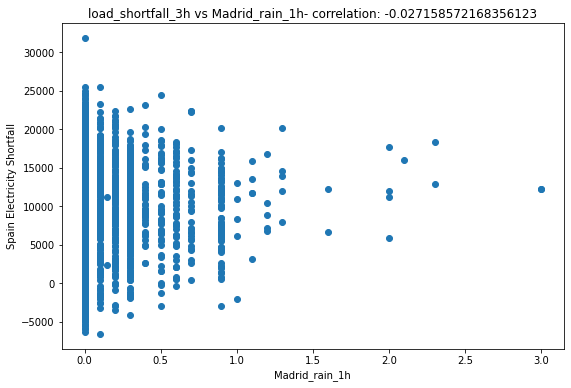

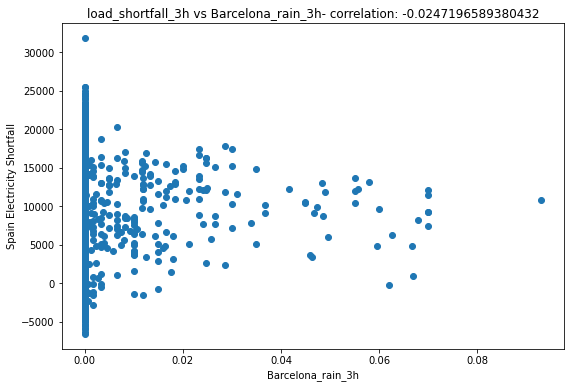

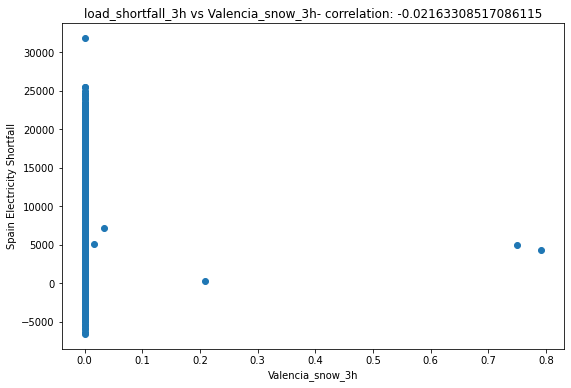

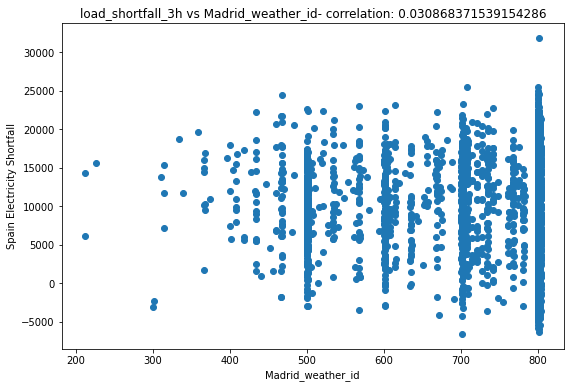

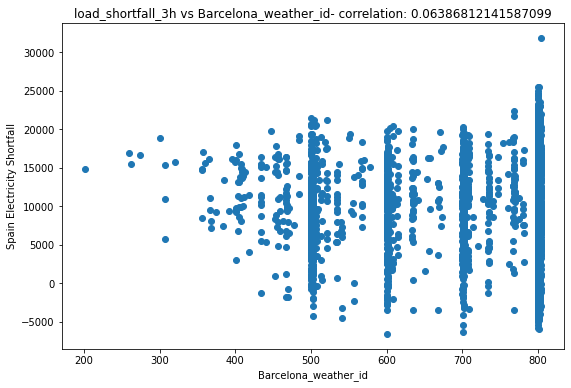

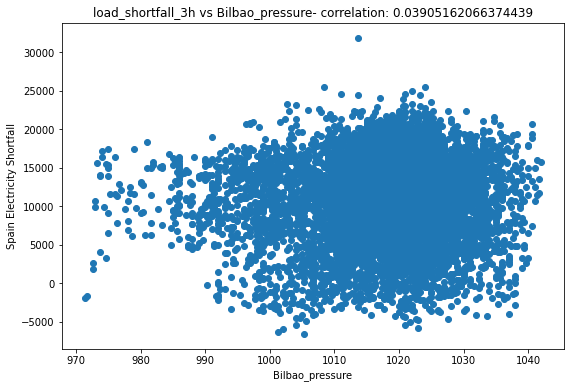

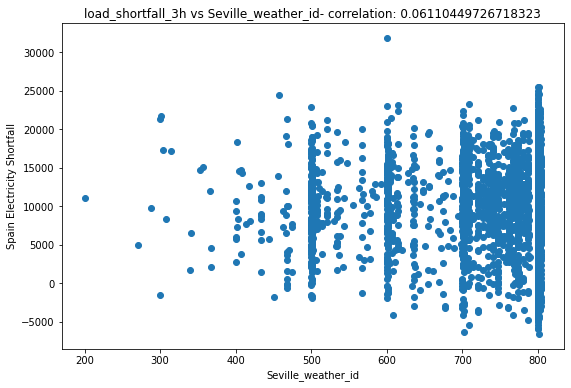

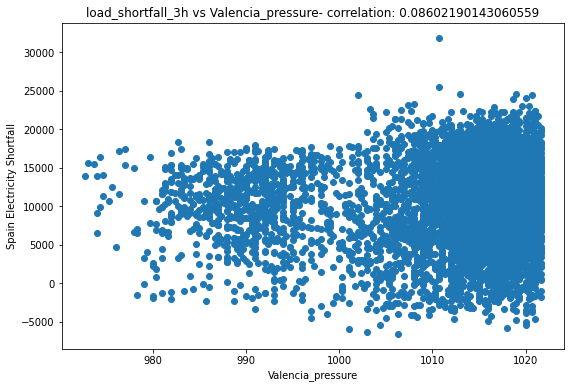

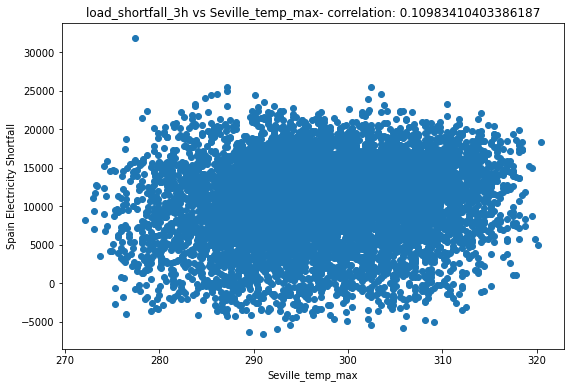

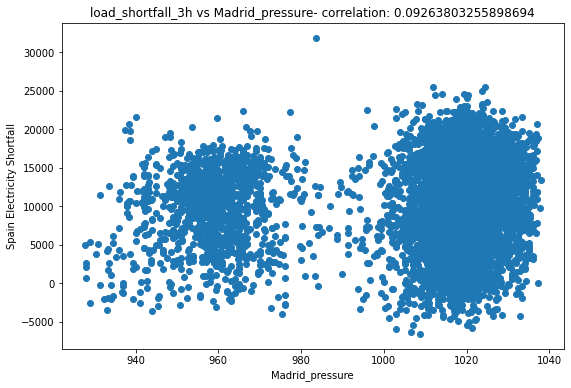

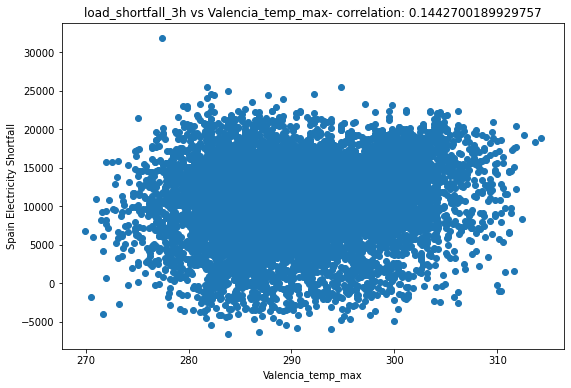

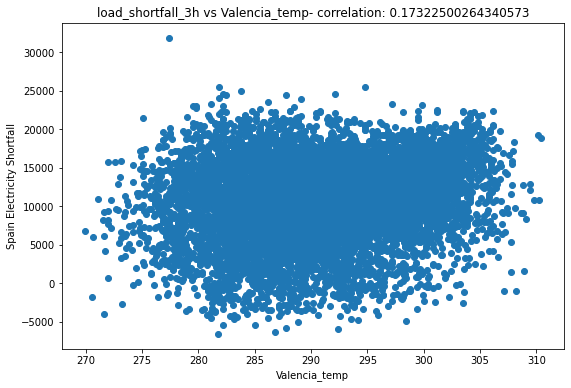

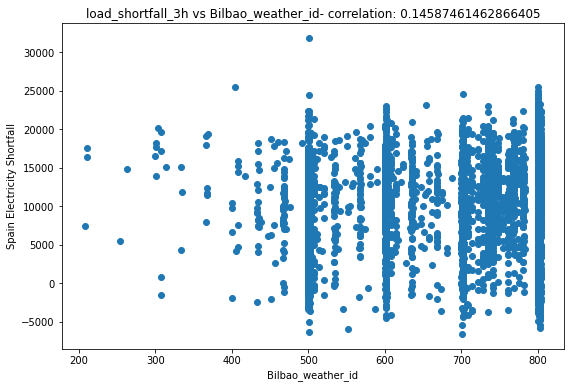

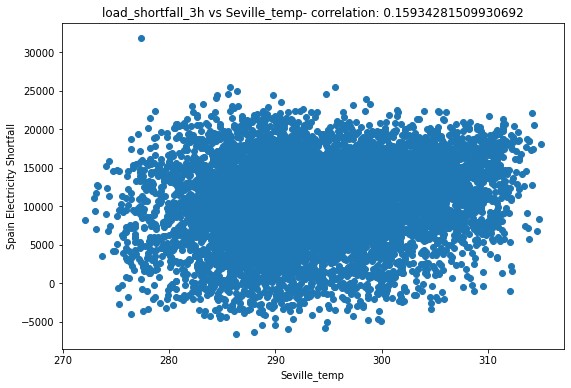

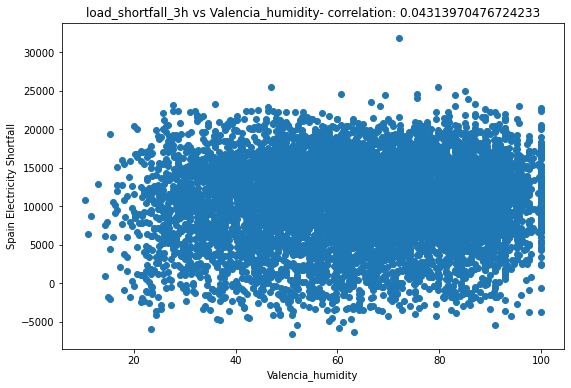

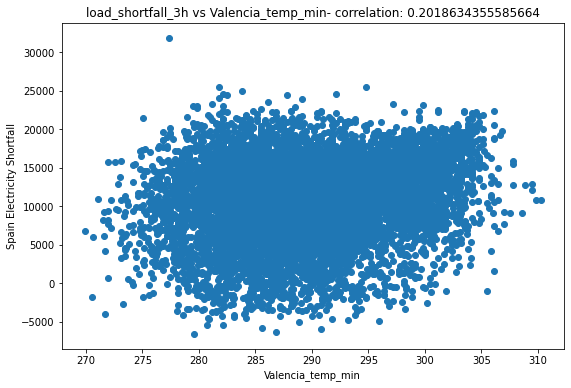

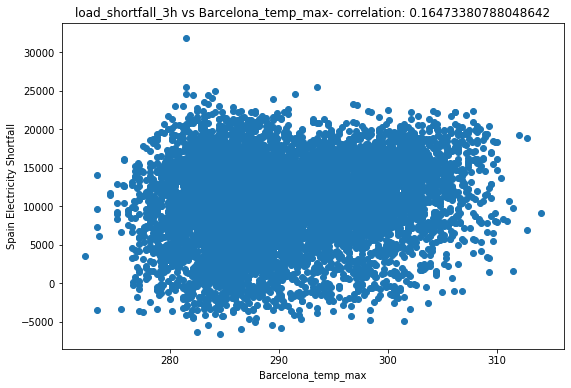

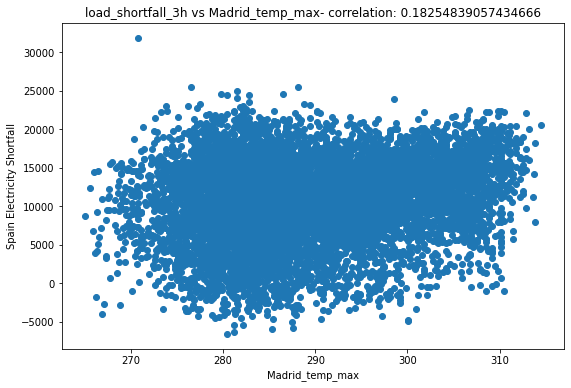

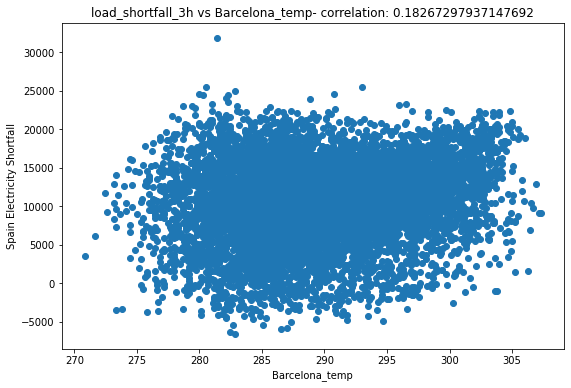

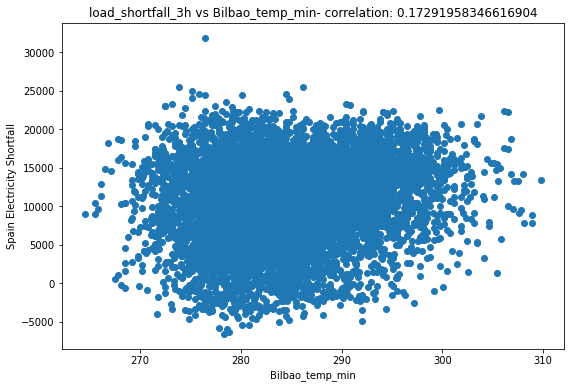

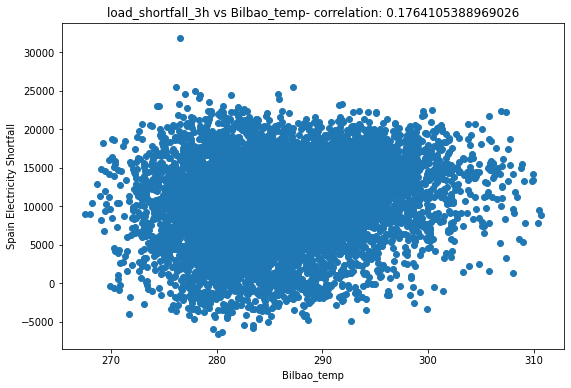

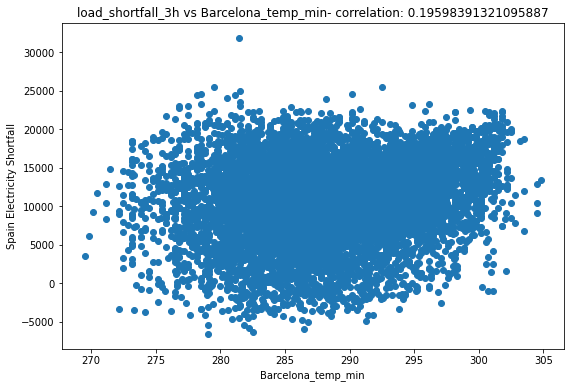

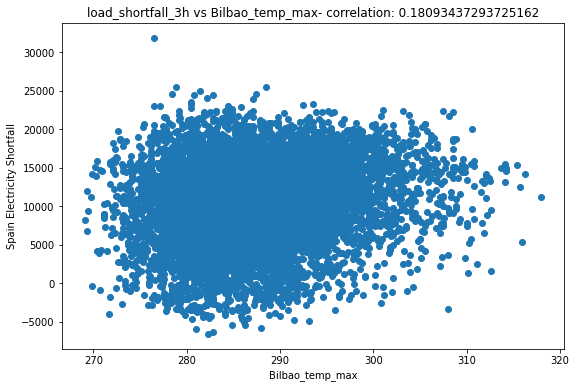

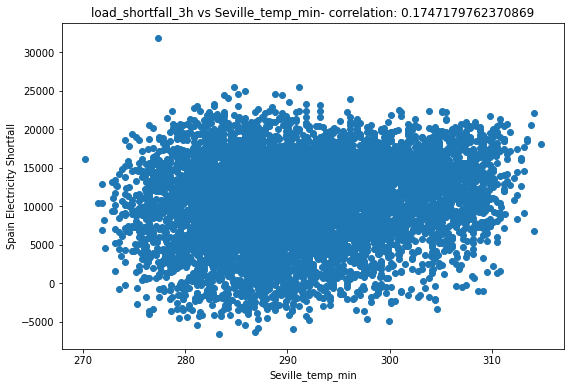

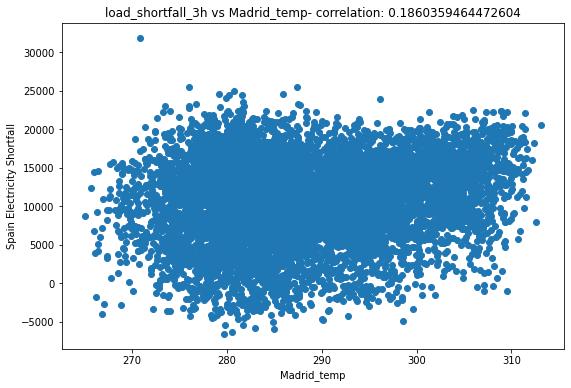

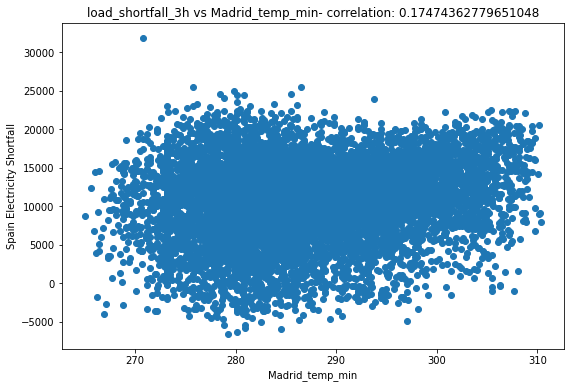

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_train[col]
    label = df_train['load_shortfall_3h']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Spain Electricity Shortfall')
    ax.set_title('load_shortfall_3h vs ' + col + '- correlation: ' + str(correlation))
plt.show()

The results are not conclusive, but if you look closely, our features seem like thre exists no correlation between target variable and the features

##### We've explored the distribution of the numeric values in the dataset, but what about the categorical features? These aren't continuous numbers on a scale, so we can't use histograms; but we can plot a boxplot showing the count of each discrete value for each category.

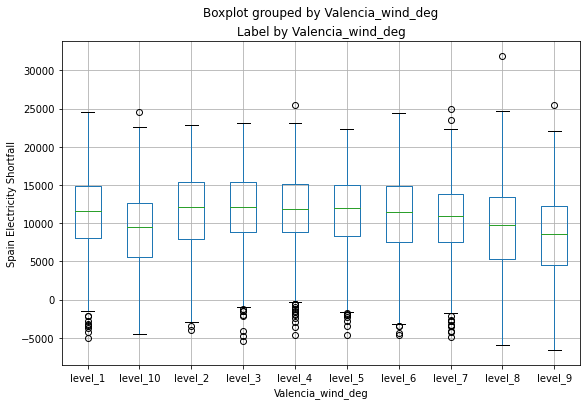

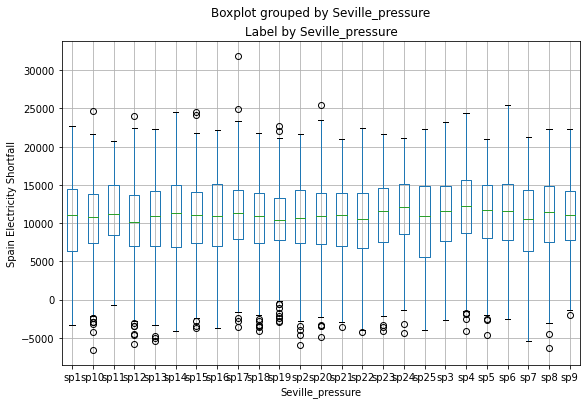

In [ ]:
# plot relevant feature interactions
for col in ['Valencia_wind_deg', 'Seville_pressure']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df_train.boxplot(column = 'load_shortfall_3h', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Spain Electricity Shortfall")
plt.show()


The plots show some little to no variance in the relationship between some category values and load_shortfall_3h. However, load_shortfall is prone to outliers in most of the categories.

##### Having seen how the categorical and numerical features relate with the target variable, we will now plot relevant feature interactions

In [ ]:
# have a look at feature distributions
corrmat = df_train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'load_shortfall_3h')['load_shortfall_3h'].index

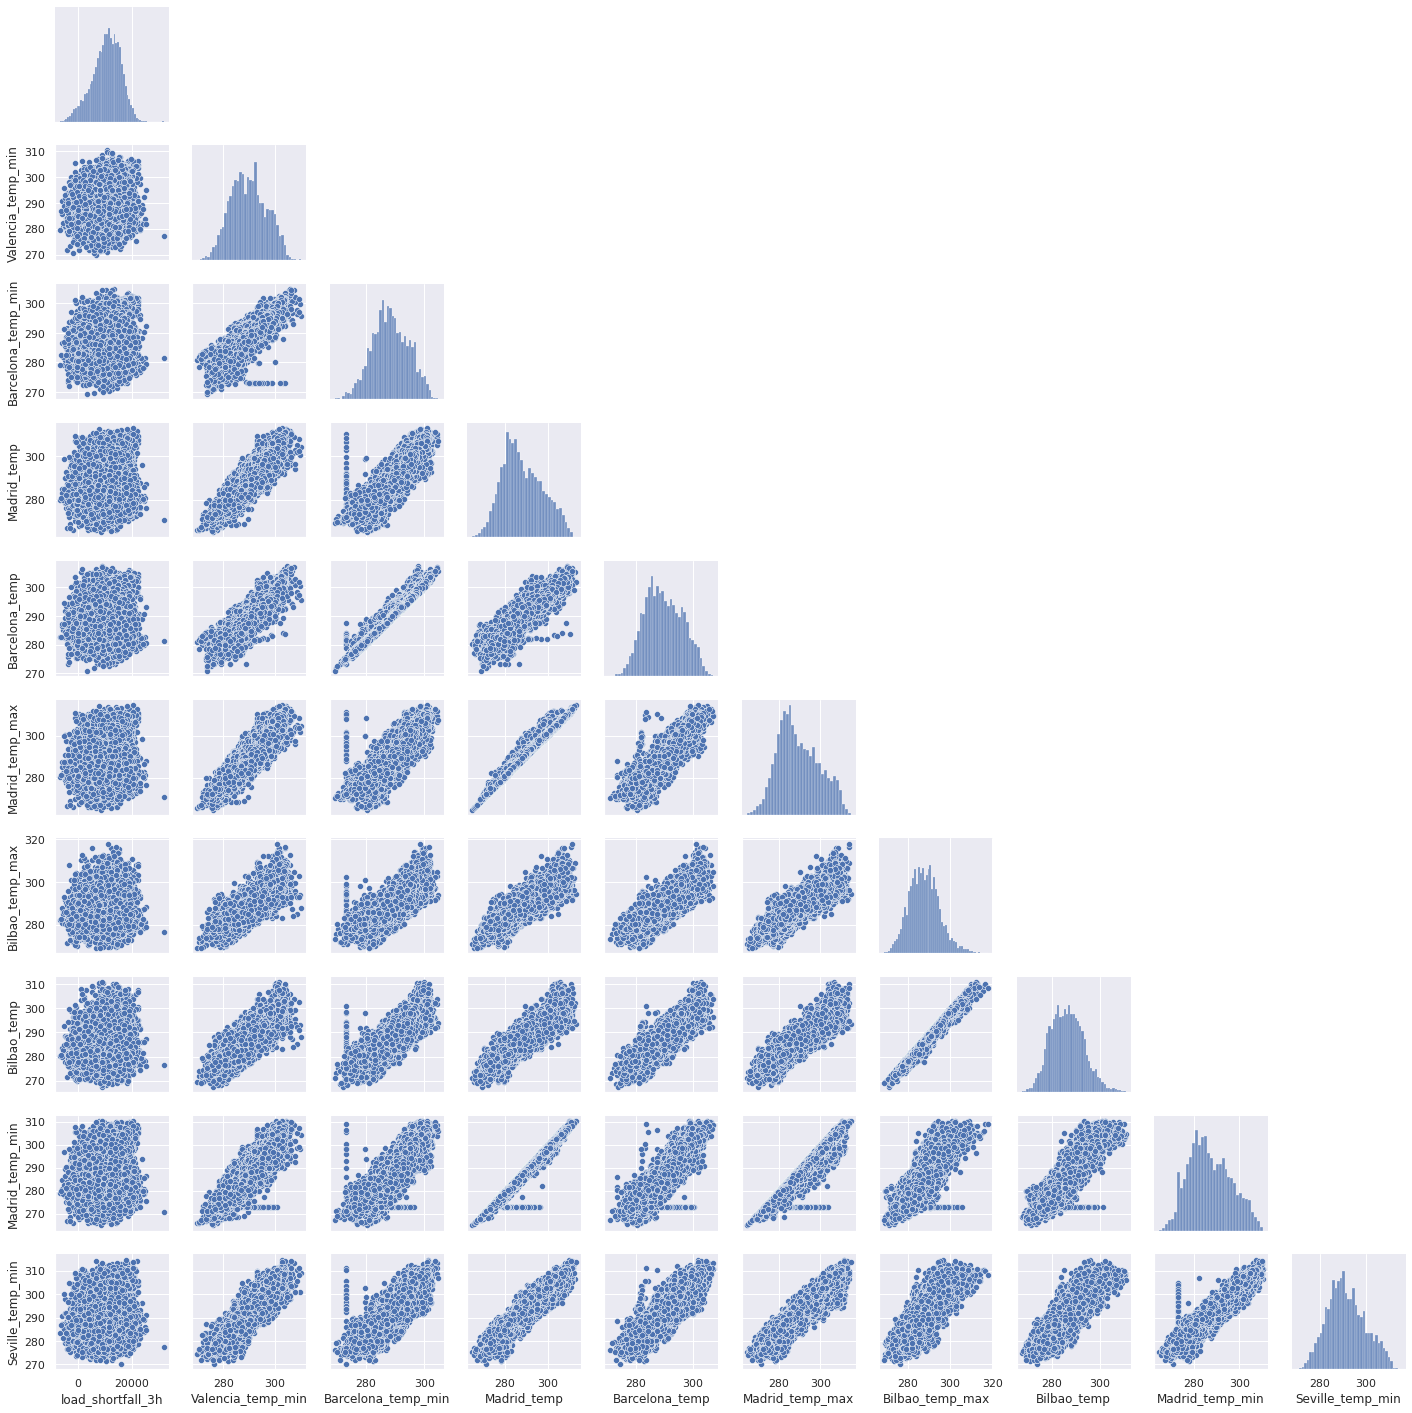

In [ ]:
sns.set()
sns.pairplot(df_train[cols], size = 2, corner =True)
plt.show();

With the exception of Madrid tem, min, and max, which are somewhat skewed to the right, the majority of the feature distribution is quite regular. Because the relationships between the attributes are linear, they are positively correlated.

From the graphs we can also see that most of the features are linearly correlated with each other and each feature has a fairly normal distribution. But, the correlation between the target variable and the individaul features do not show as much linear correlation. So we will need to select features that best perfom at predicting our target variable.

We can also achieve the correlation using a heat map and see the values of their correlations

Text(0.5, 1.0, 'Correlation Heatmap')

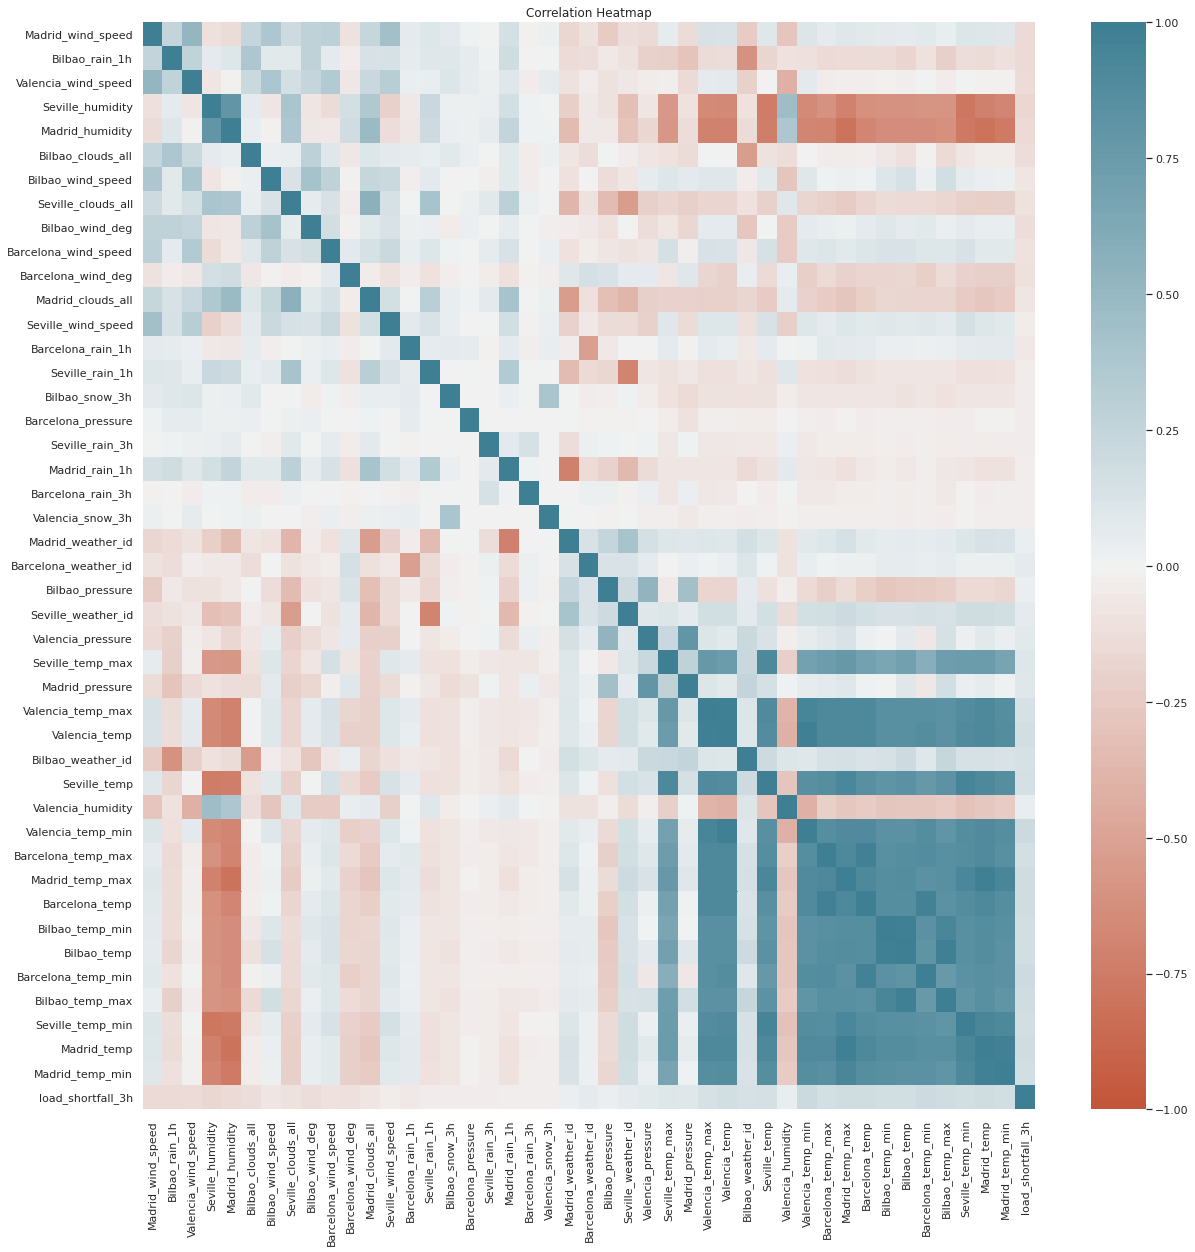

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
heatmap = sns.heatmap(df_train.corr(),ax=ax, vmin=-1, vmax=1, annot=False,cmap=sns.diverging_palette(20, 220, n=200),)
heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize":12})

Towards the bottom left of our heatmap whe have features which are positively correlated and note that during training the model we will have to drop some of them Notice also humidity and temeprature features are negatively correlated, temperature features are positively correlated.

#### After understanding our features, their realtionships, their datatypes we can now go ahead and perform some feature engineering

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### At this point, we have quite an idea of what the data is about and what we can achieve with it. We begin data engineering with an objective. The idea being to clean and add features relative to the objective in preparation to build the best model.



#####  We look at our categorical columns which are in string format.  Machine learning models works best with numerical data. Therefore we are going to encode our categories so that they are in numeric

How many unique values do we have for the two columns?

In [ ]:
print('Sum of unique object:', {df_train.Valencia_wind_deg.value_counts().count()})
print(df_train.Valencia_wind_deg.unique())

print('Sum of unique object:', {df_train.Seville_pressure.value_counts().count()})
print(df_train.Seville_pressure.unique())


Sum of unique object: {10}
['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6', 'level_4', 'level_3', 'level_1', 'level_2']
Categories (10, object): ['level_1', 'level_10', 'level_2', 'level_3', ..., 'level_6', 'level_7',
                          'level_8', 'level_9']
Sum of unique object: {25}
['sp25', 'sp23', 'sp24', 'sp21', 'sp16', ..., 'sp10', 'sp7', 'sp3', 'sp2', 'sp1']
Length: 25
Categories (25, object): ['sp1', 'sp10', 'sp11', 'sp12', ..., 'sp6', 'sp7', 'sp8', 'sp9']


...Unique categories in Valencia_wind_deg are 10 while for Seville_pressure are 25


##### The pandas method called get_dummies gets in handy for this process. The text data are categorical variables, and get_dummies will transform all the categorical text data into numbers by adding a column for each distinct category.

In [ ]:
df_test_dummies = pd.get_dummies(df_test_copy,drop_first = True)

# a copy of test data that has the cat features as num  
df_test_copy = df_test_dummies.copy()
                                                

In [ ]:
df_train_dummies = pd.get_dummies(df_train_copy,drop_first = True)
df_train_dummies.head()

time  ...  Seville_pressure_sp9
0 2015-01-01 03:00:00  ...                     0
1 2015-01-01 06:00:00  ...                     0
2 2015-01-01 09:00:00  ...                     0
3 2015-01-01 12:00:00  ...                     0
4 2015-01-01 15:00:00  ...                     0

[5 rows x 79 columns]

After, We reorder our columns such that our dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of our data easy to interpret.

In [ ]:
#reorder columns

column_titles = [col for col in df_train_dummies.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df_train_dummies=df_train_dummies.reindex(columns=column_titles)



We then proceed to split our time column into year, month, week, day , hour  as a way of expanding our features for training our models. The features will help us see clearly how different times and seasons associate with the target variable. 

In [ ]:
# create new features

# year
df_train_dummies['Year'] = df_train_dummies['time'].dt.year

# month
df_train_dummies['Month'] = df_train_dummies['time'].dt.month

# day
df_train_dummies['Day'] = df_train_dummies['time'].dt.day

# Dayofweek
df_train_dummies['Day_of_week'] = df_train_dummies['time'].dt.weekday

# hour
df_train_dummies['Start_hour'] = df_train_dummies['time'].dt.hour

# hour
#df_train['Hour_of_week'] = data_df['time'].dt.dayofweek * 24 + (df['time'].dt.hour + 1)




# Drop Feature
df_train_dummies.drop(['time'] , axis=1 , inplace=True)


In [ ]:
# create new features

# year
df_test_dummies['Year'] = df_test_dummies['time'].dt.year

# month
df_test_dummies['Month'] = df_test_dummies['time'].dt.month

# day
df_test_dummies['Day'] = df_test_dummies['time'].dt.day

# Dayofweek
df_test_dummies['Day_of_week'] = df_test_dummies['time'].dt.weekday

# hour
df_test_dummies['Start_hour'] = df_test_dummies['time'].dt.hour

# hour
#df_train['Hour_of_week'] = data_df['time'].dt.dayofweek * 24 + (df['time'].dt.hour + 1)

df_test_dummies.drop(['time'] , axis=1 , inplace=True)


In [ ]:
df_train_dummies.shape

(8763, 83)

We can observe that the number of columns has increased from 48 columns up to 83 columns. This is due to the dummy variable encoding and splitting our date time.

##### Earlier we saw that Valencia _pressure had missing values. We are going to iteratively impute the missing values with as one of the methods of filling missing values.
(Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_train_dummies.values)
IterativeImputer(random_state=0)

imputed = imp.transform(df_train_dummies.values)

In [ ]:
df_train_dummies = pd.DataFrame(imputed, index=df_train_dummies.index, columns=df_train_dummies.columns)
df_train_dummies.shape

(8763, 83)

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_test_dummies.values)
IterativeImputer(random_state=0)

imputed_test = imp.transform(df_test_dummies.values)

In [ ]:
df_test_dummies = pd.DataFrame(imputed_test, index=df_test_dummies.index, columns=df_test_dummies.columns)
df_test_dummies.shape

(2920, 82)

In [ ]:
df_train_dummies.Valencia_pressure.isnull().sum()

0

.... our data is now filled, i.e. no missing values

##### ...... We can now look at the correlation matrix

In [ ]:
df_train_dummies.corr()

Madrid_wind_speed  ...    Start_hour
Madrid_wind_speed             1.000000  ...  1.862275e-01
Bilbao_rain_1h                0.259719  ...  5.452669e-02
Valencia_wind_speed           0.513092  ...  2.041029e-01
Seville_humidity             -0.117892  ... -4.249821e-01
Madrid_humidity              -0.137092  ... -3.078718e-01
...                                ...  ...           ...
Year                         -0.031553  ...  2.748198e-04
Month                        -0.237445  ...  3.013643e-04
Day                          -0.029954  ...  2.849199e-04
Day_of_week                  -0.000404  ...  6.141191e-07
Start_hour                    0.186228  ...  1.000000e+00

[83 rows x 83 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

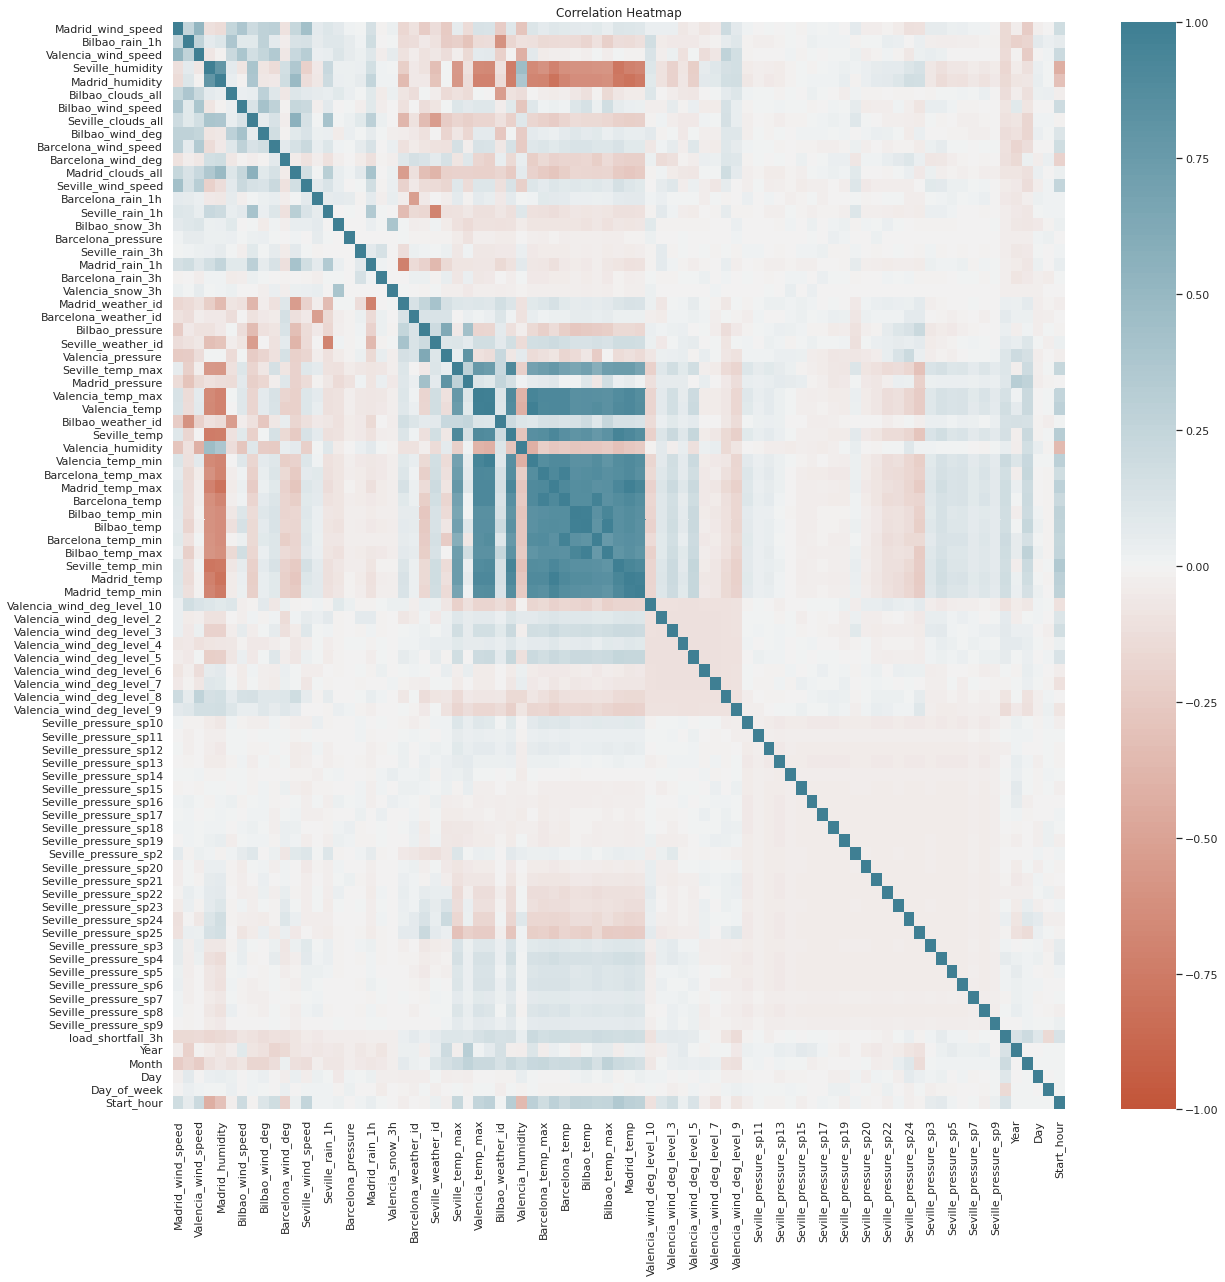

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
heatmap = sns.heatmap(df_train_dummies.corr(),ax=ax, vmin=-1, vmax=1, annot=False,cmap=sns.diverging_palette(20, 220, n=200),)
heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize":12})

We can tell that there is multicolinearity from the correlation matrix and the correlation heatmap. For example, there is a high positive link between madrid humidity and seville humidity. To avoid working with redundant data, we'll have to choose which variables to include in our model.

Is our data ready for training an ML model.... Not yet,
We need to get all the features on the same scale.

##### Previously we saw that some of our features had vast outliers. Standardisation to the rescue--since it handles outliers gracefully.

In [ ]:
# remain with the predictors
df_train_features = df_train_dummies.drop(['load_shortfall_3h'] , axis=1).columns

In [ ]:
# import scaler method from sklearn

#Scale the dataset
scaler = StandardScaler()
#fit the scaler to the values
df_train_scaled_features = scaler.fit_transform(df_train_dummies.drop(['load_shortfall_3h'] , axis=1).values)


In [ ]:
#fit the standardscaler to our test
df_test_scaled_features = scaler.fit_transform(df_test_dummies.values)

In [ ]:
#fit the standardscaler to our train
df_test_scaled = pd.DataFrame(df_test_scaled_features, index=df_test_dummies.index, columns=df_train_features)
df_test_scaled.shape

(2920, 82)

Our values have been scaled. We just need them as a dataframe

In [ ]:
#convert to a dataframe
df_train_scaled = pd.DataFrame(df_train_scaled_features, index=df_train_dummies.index, columns=df_train_features)
df_train_scaled.head()


Madrid_wind_speed  Bilbao_rain_1h  ...  Day_of_week  Start_hour
0          -0.950708       -0.362123  ...     -0.00274   -1.090901
1          -1.130863       -0.362123  ...     -0.00274   -0.654451
2          -0.770554       -0.362123  ...     -0.00274   -0.218001
3          -0.770554       -0.362123  ...     -0.00274    0.218449
4          -0.770554       -0.362123  ...     -0.00274    0.654899

[5 rows x 82 columns]

...All values are now on the same scale. We are ready to train our regression model

#### We will split our data into training and testing, select best features for a regression then train using different models to evaluate our test set using rmse and r-squared statistic as a metric for accuracy to get the best performing model.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

##### Now we are satisfied and happy with our data and feature addition. Time to create the models!!!


We will begin by splitting our data into the training set and testing set

In [ ]:
# create targets and features dataset
# split data


# Split data 80%-20% into training set and test set with a random_state of 42 
X = df_train_scaled
y = df_train_dummies['load_shortfall_3h']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 7010 rows
Test Set: 1753 rows


Splitting our data in 80% for training we use 7010 rows and  1753 for testing

Not all features are relevant for training. Various techniques for feature selections are provided so here we will use Correlation Feature Selection.-a measure of how two variables change together.

##### The scikit-learn machine library provides an implementation of the correlation statistic in the f_regression() function. This function can be used as a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

In [ ]:
# configure to select all features
best_features = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
best_features.fit(X_train, y_train)
# transform train input data
X_train_best_features = best_features.transform(X_train)
# transform test input data
X_test_best_features = best_features.transform(X_test)


##### We can then print the scores for each variable (largest is better) and plot the scores for each variable as a bar graph to get an idea of how many features we should select.

Feature 0: 158.416129


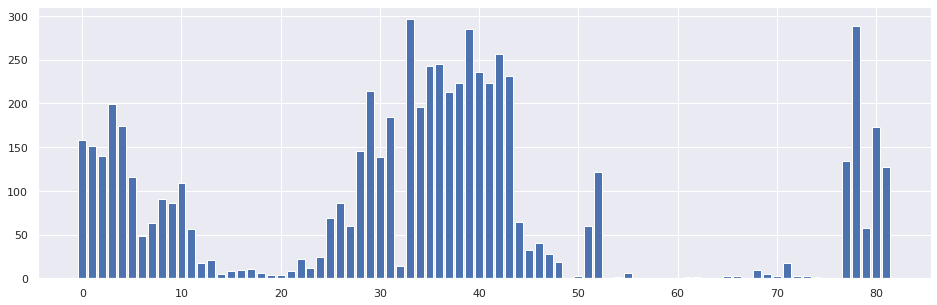

Feature 1: 151.060339


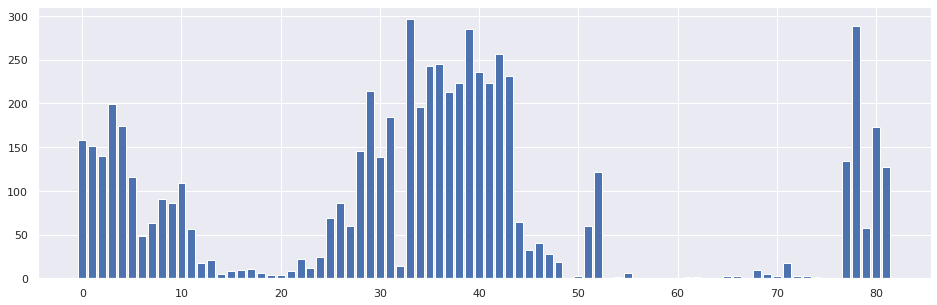

Feature 2: 140.309977


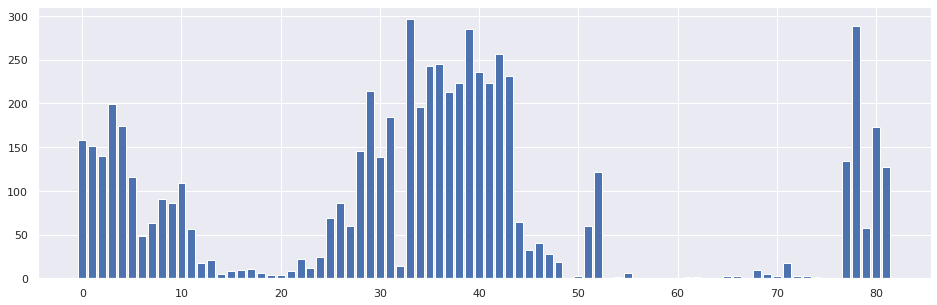

Feature 3: 198.684435


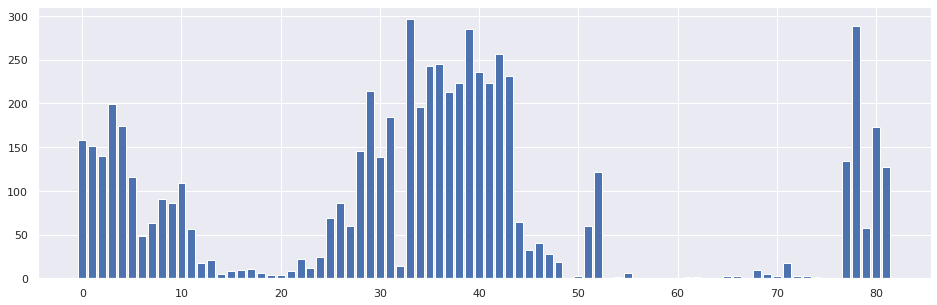

Feature 4: 174.215730


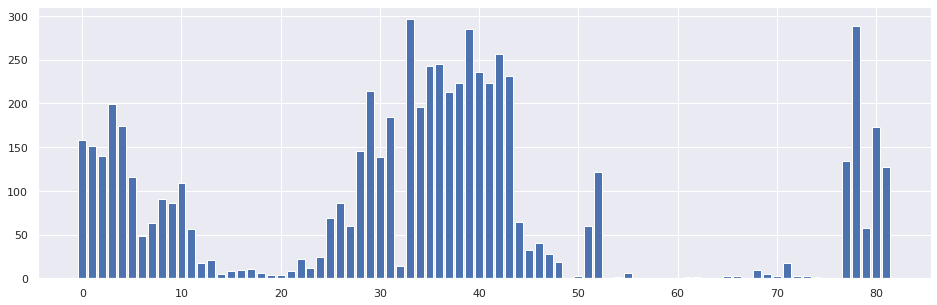

Feature 5: 115.970322


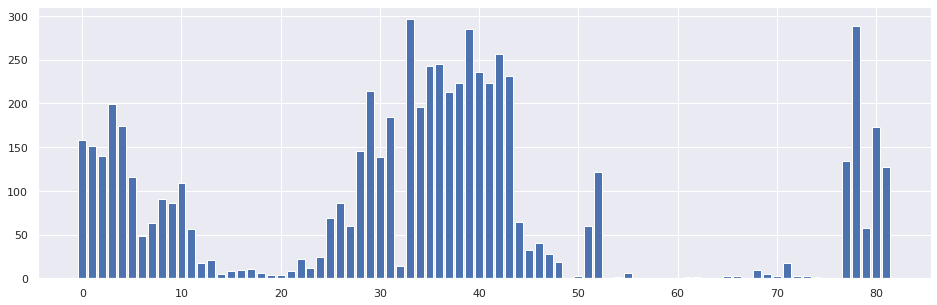

Feature 6: 48.443343


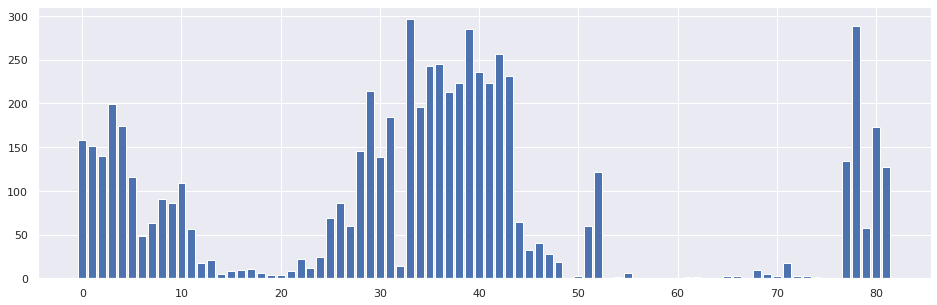

Feature 7: 63.650172


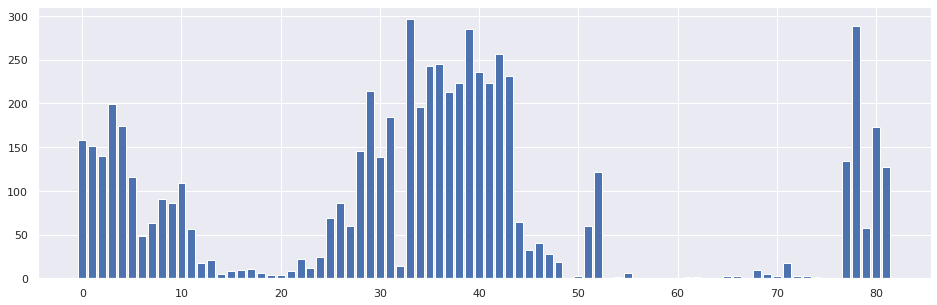

Feature 8: 90.137591


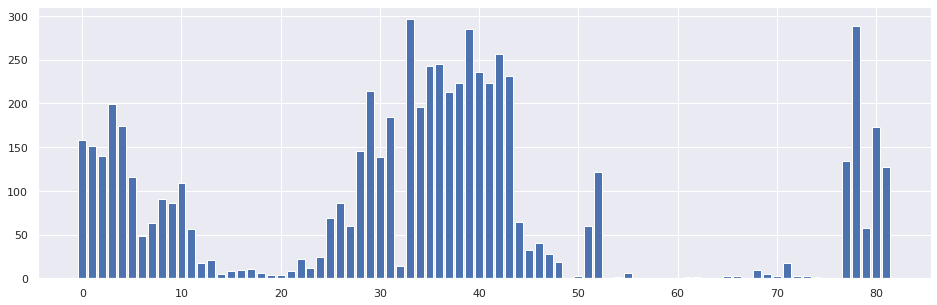

Feature 9: 86.068724


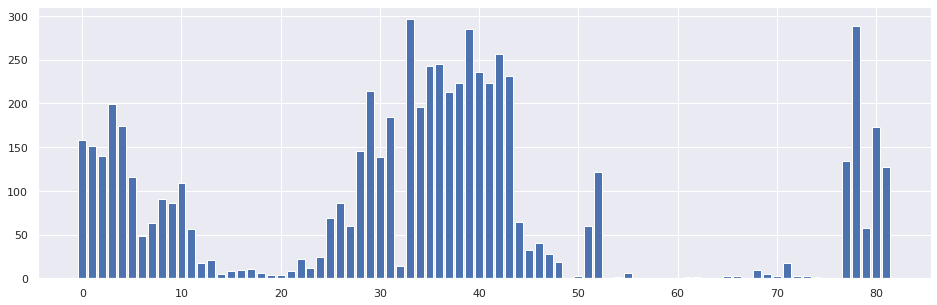

Feature 10: 108.451156


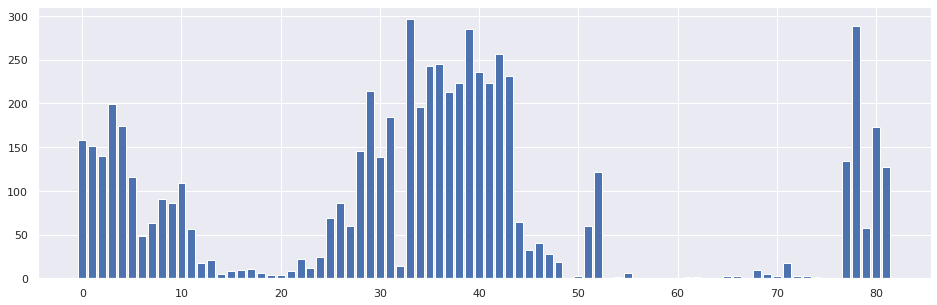

Feature 11: 56.192981


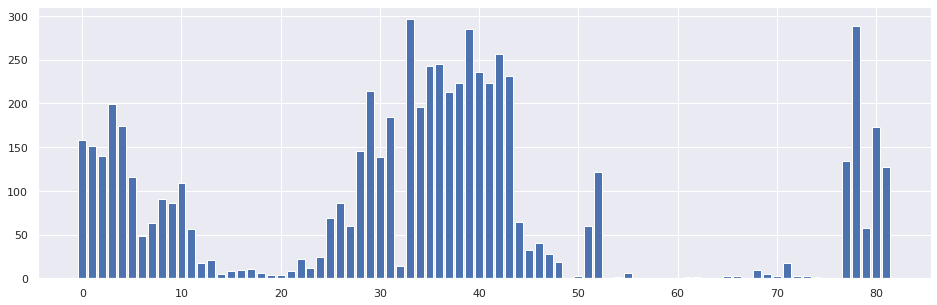

Feature 12: 17.334378


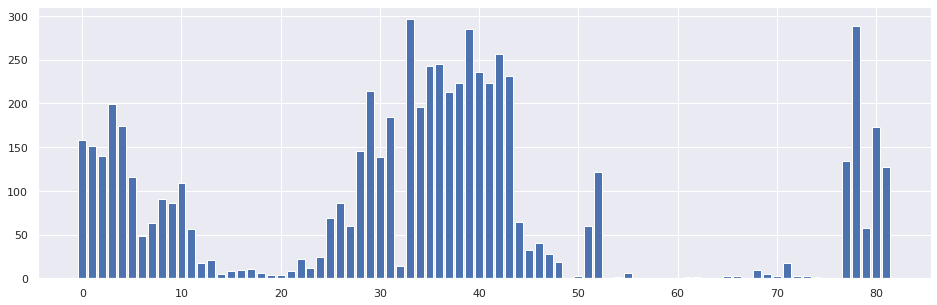

Feature 13: 21.031491


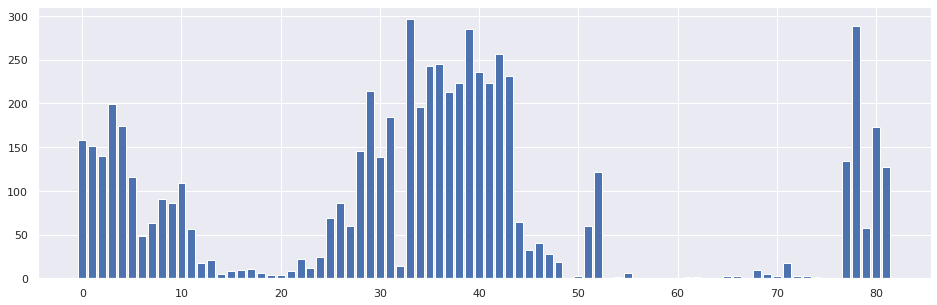

Feature 14: 4.725022


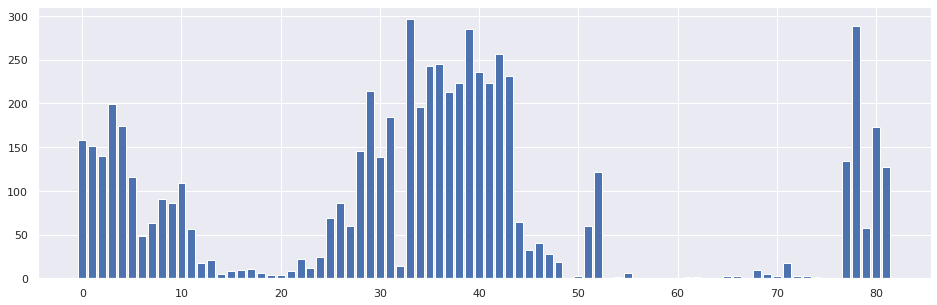

Feature 15: 7.805253


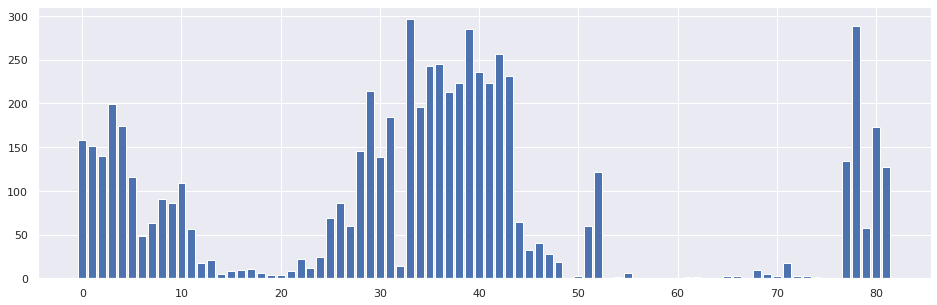

Feature 16: 9.058386


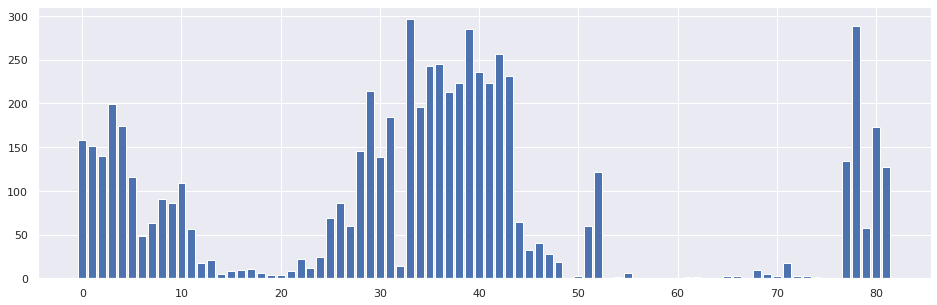

Feature 17: 10.242518


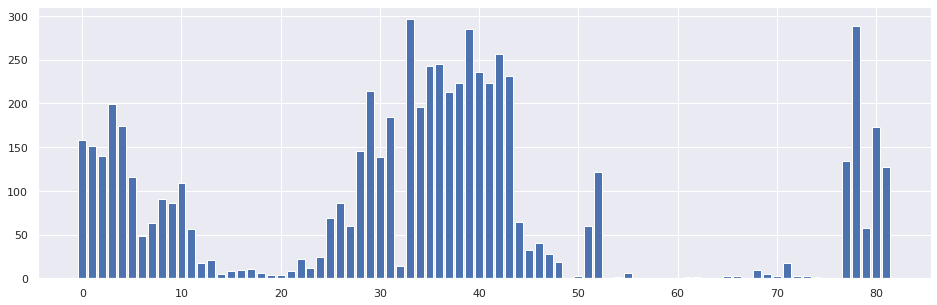

Feature 18: 5.780872


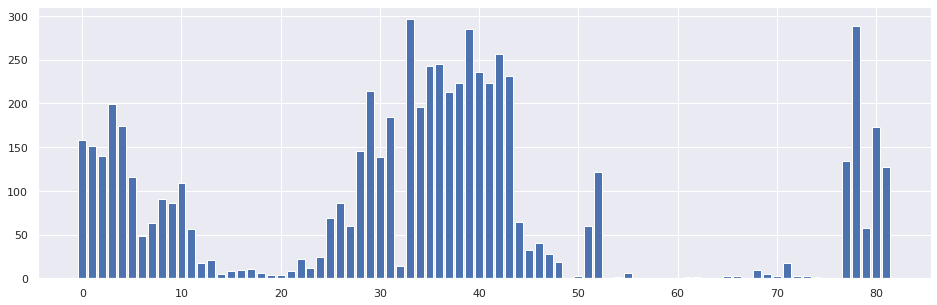

Feature 19: 3.875008


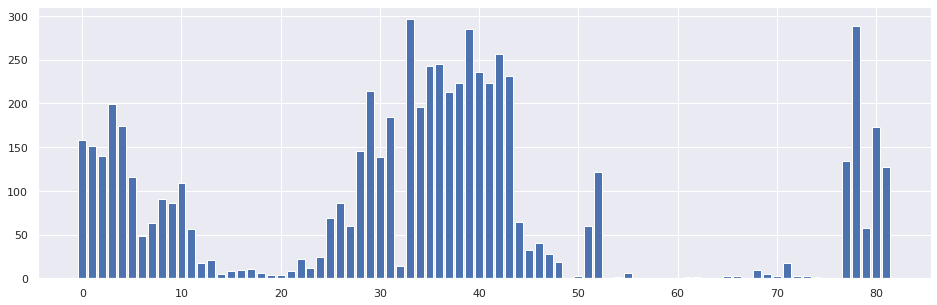

Feature 20: 4.130948


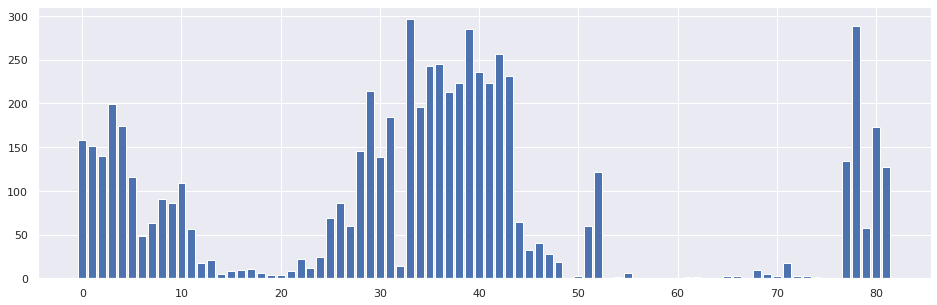

Feature 21: 8.787345


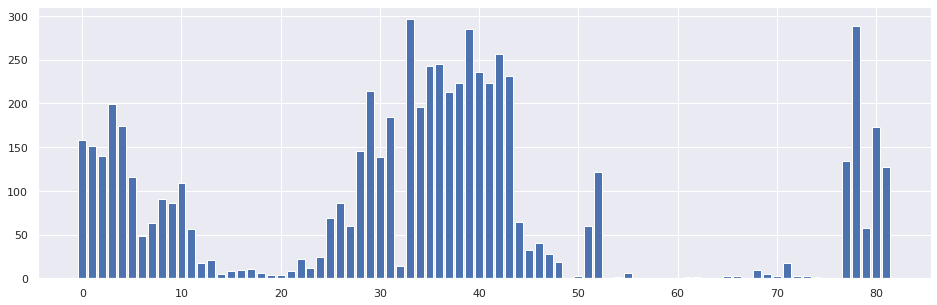

Feature 22: 22.108672


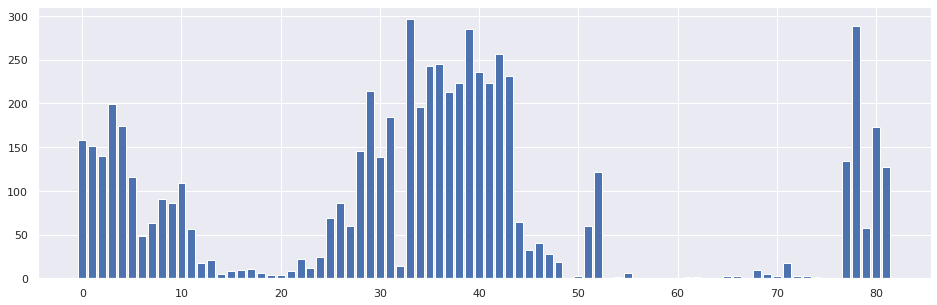

Feature 23: 12.120913


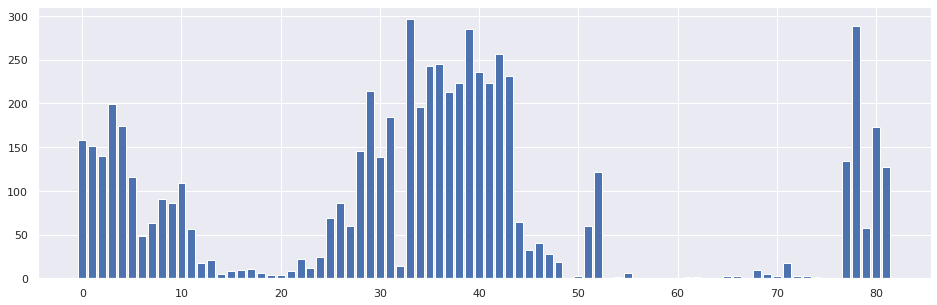

Feature 24: 24.515719


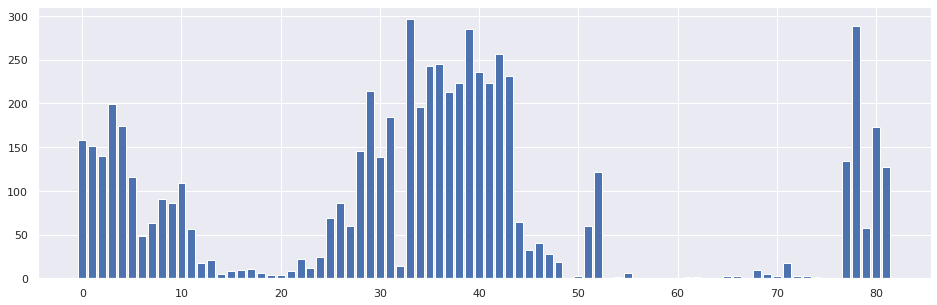

Feature 25: 69.203914


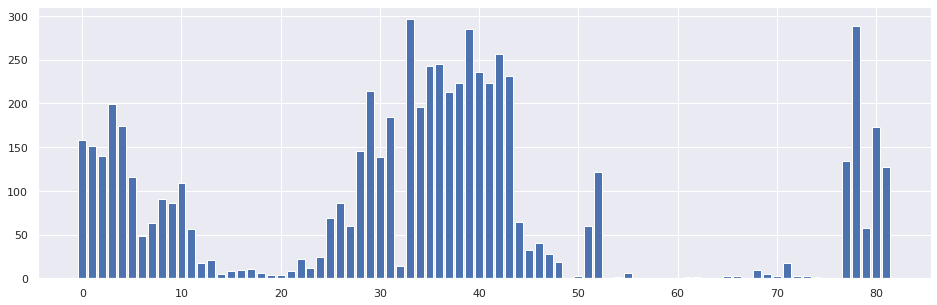

Feature 26: 86.044244


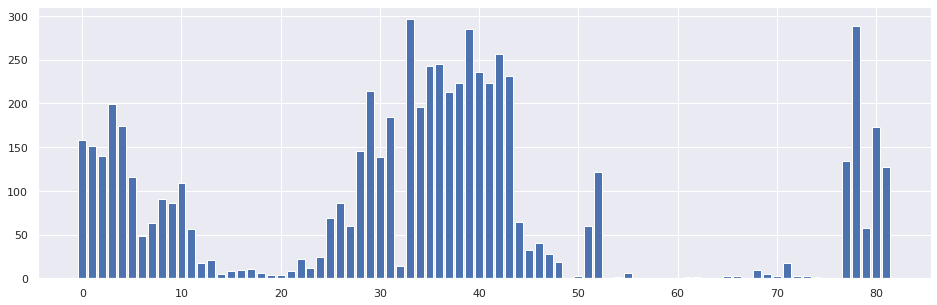

Feature 27: 59.884522


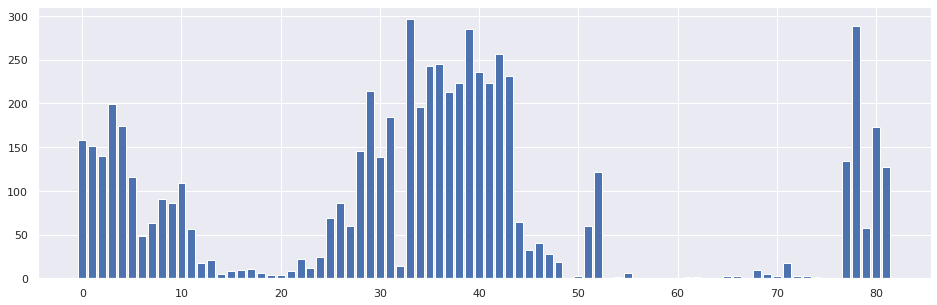

Feature 28: 145.843325


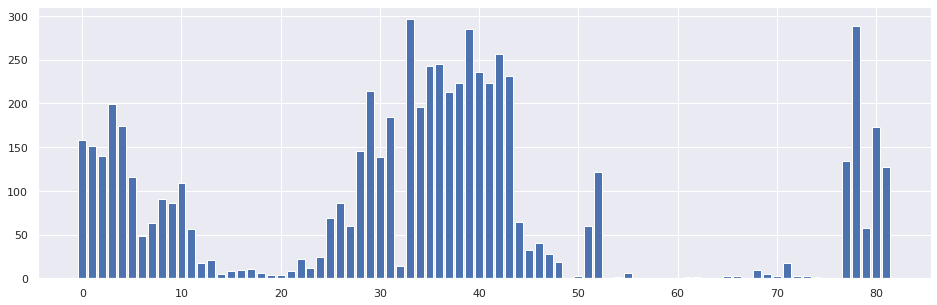

Feature 29: 214.342611


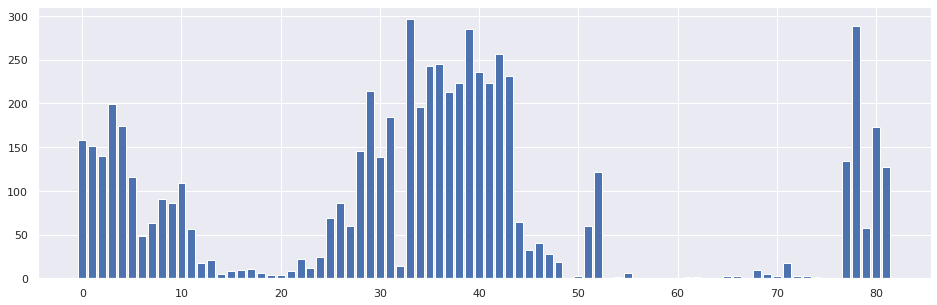

Feature 30: 138.964249


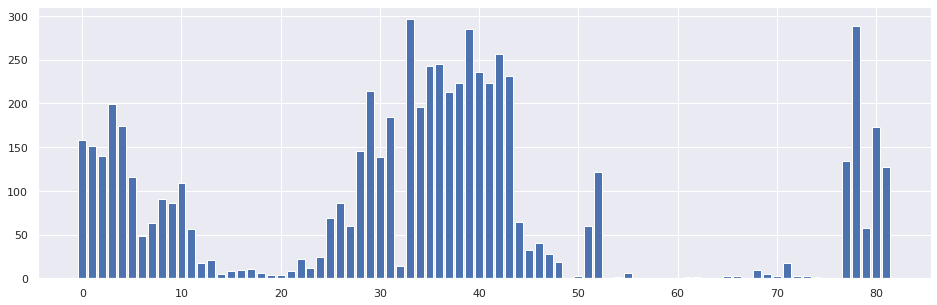

Feature 31: 184.621815


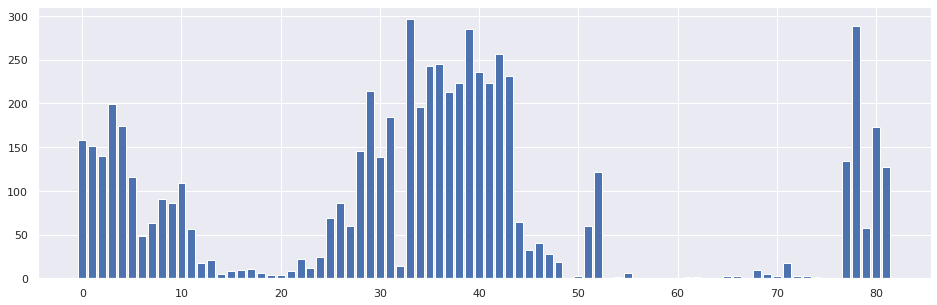

Feature 32: 14.203726


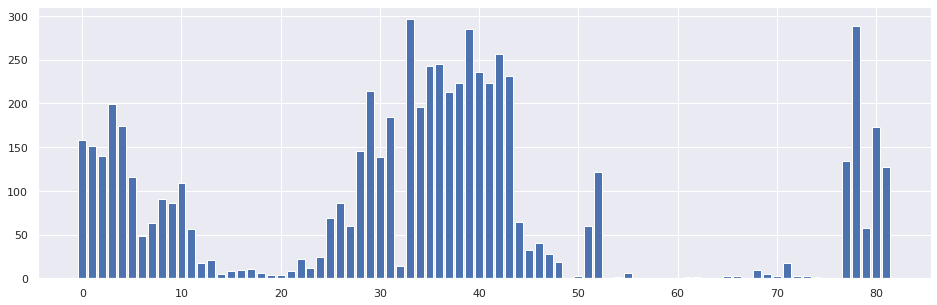

Feature 33: 295.840206


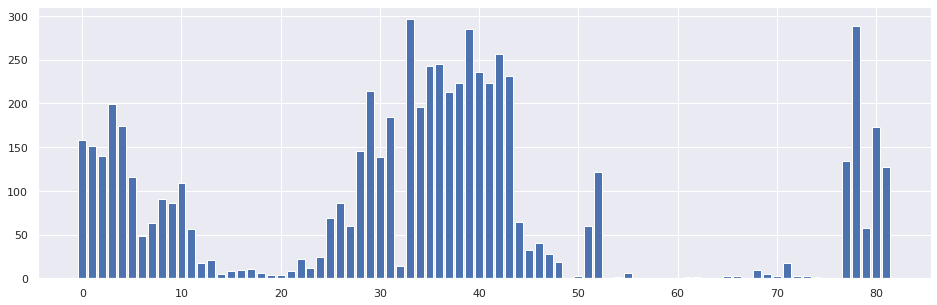

Feature 34: 196.127983


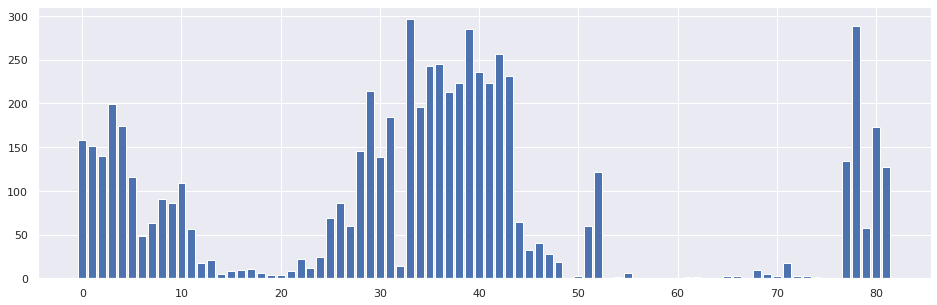

Feature 35: 242.457271


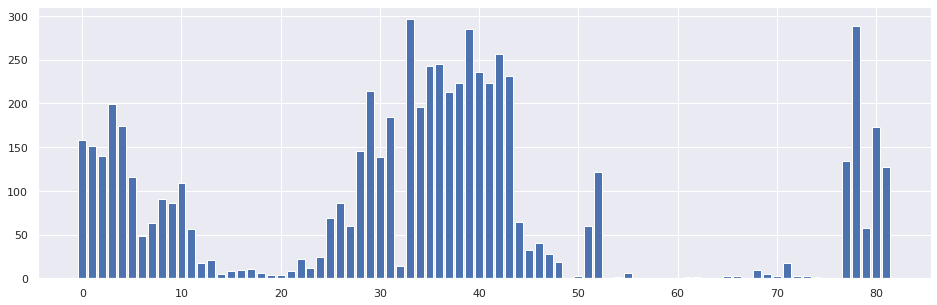

Feature 36: 244.638883


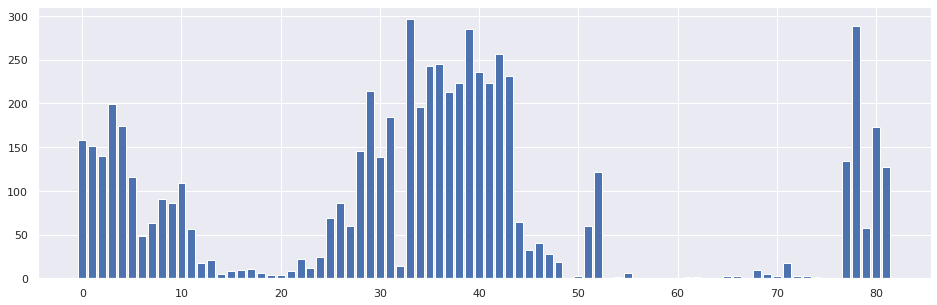

Feature 37: 212.886122


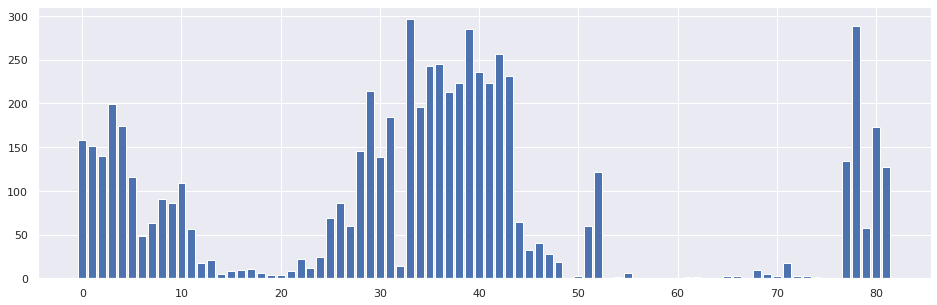

Feature 38: 223.277180


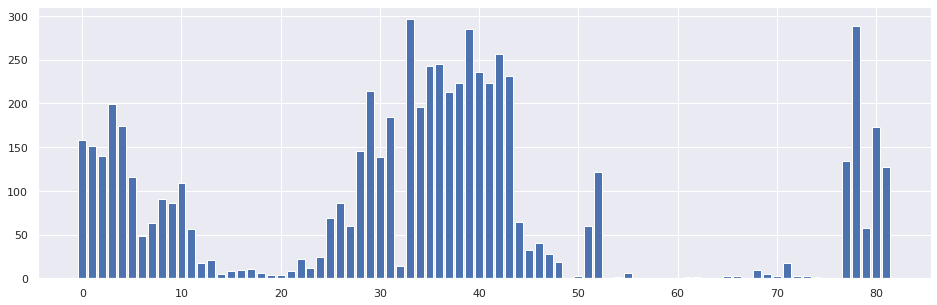

Feature 39: 285.125943


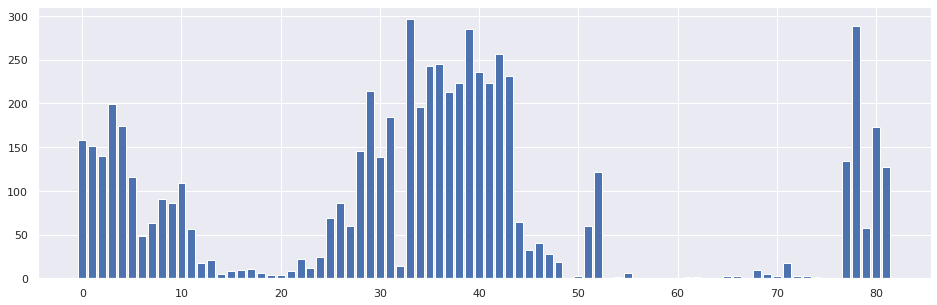

Feature 40: 236.257402


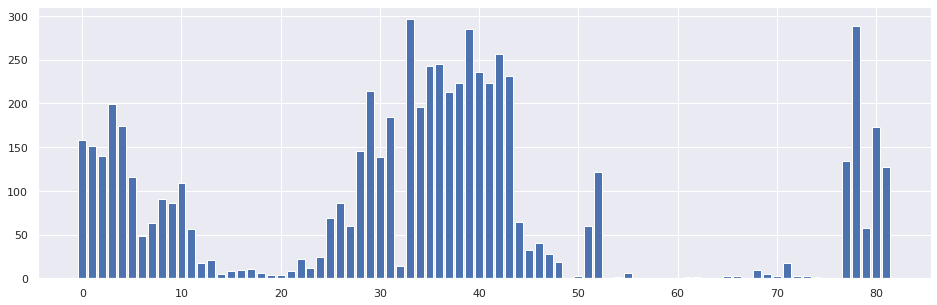

Feature 41: 222.784836


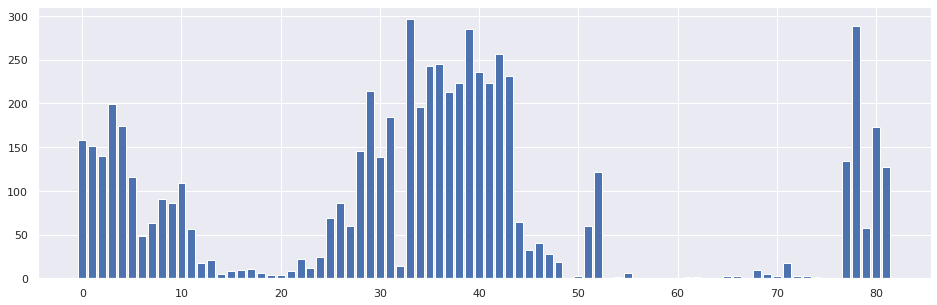

Feature 42: 256.825845


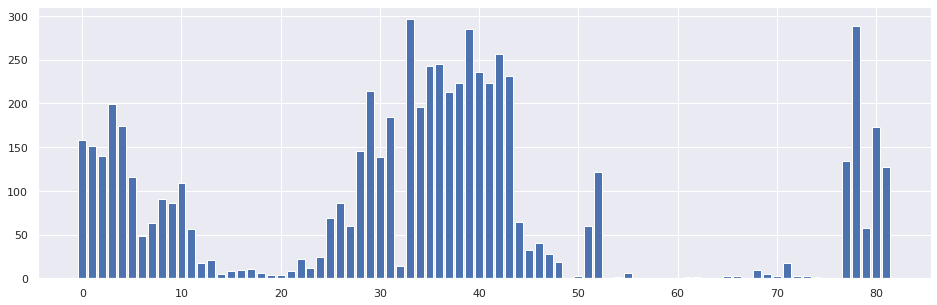

Feature 43: 230.736558


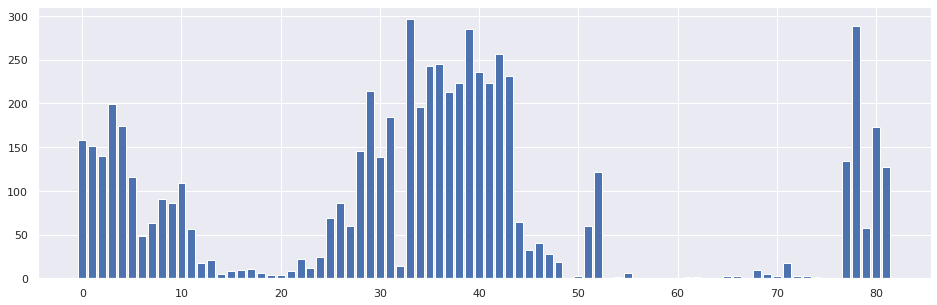

Feature 44: 64.381807


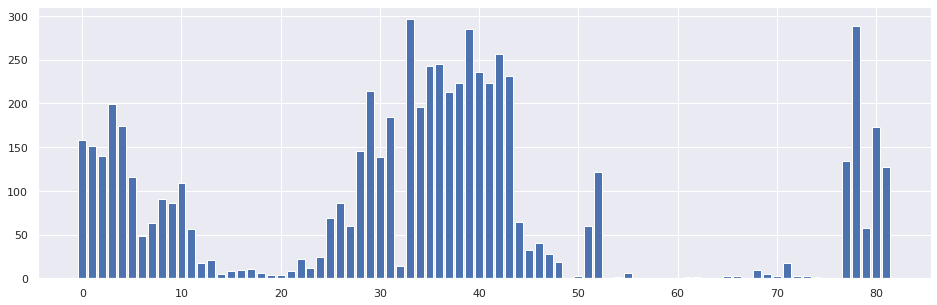

Feature 45: 32.105268


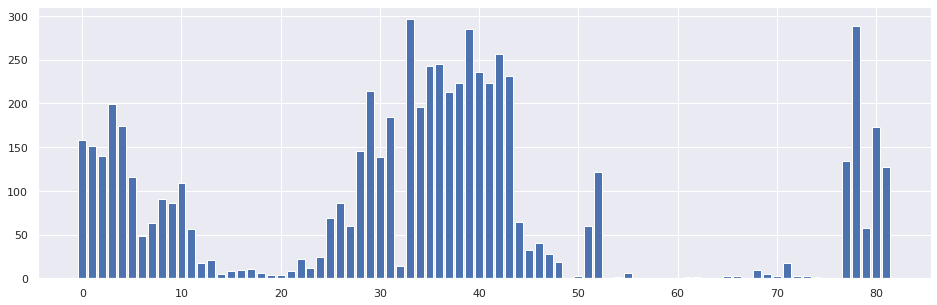

Feature 46: 40.817675


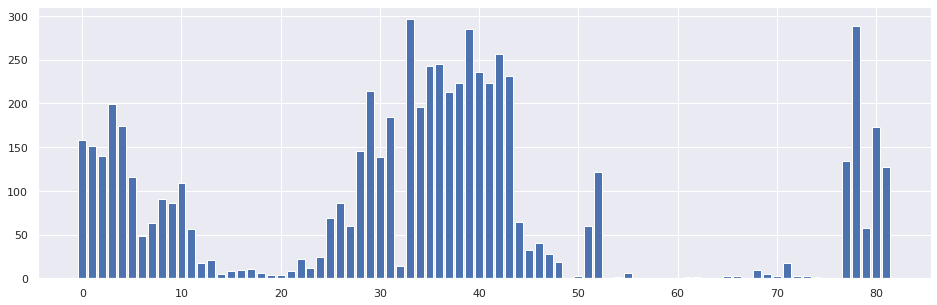

Feature 47: 28.042721


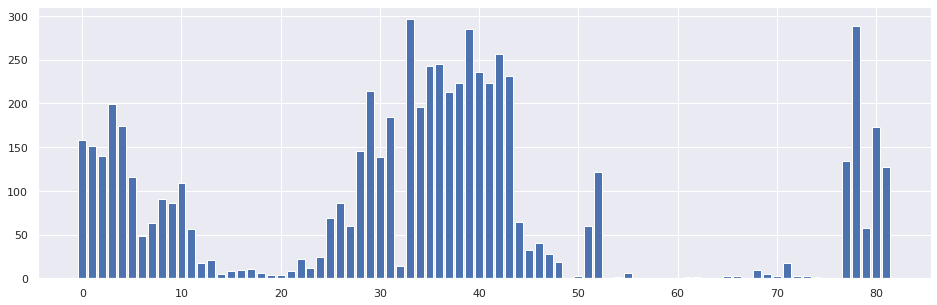

Feature 48: 18.181607


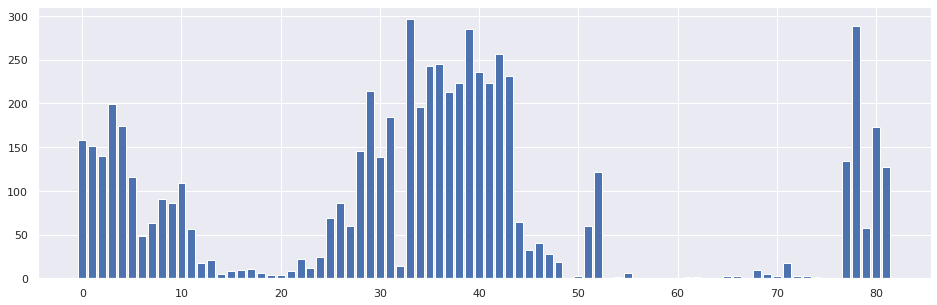

Feature 49: 0.524678


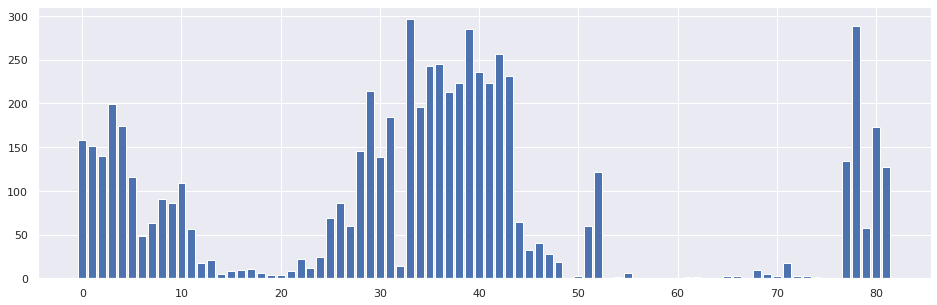

Feature 50: 2.948060


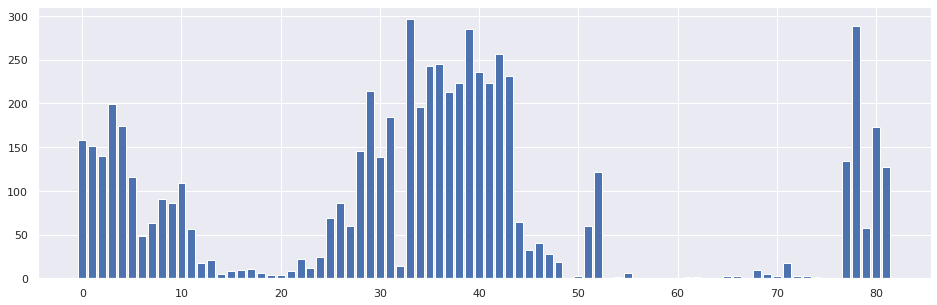

Feature 51: 59.818745


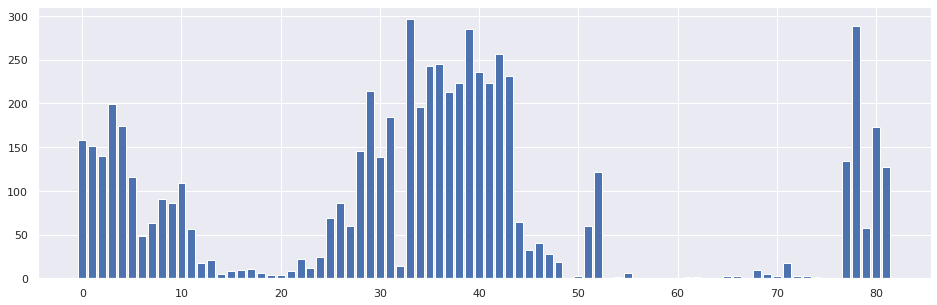

Feature 52: 121.823898


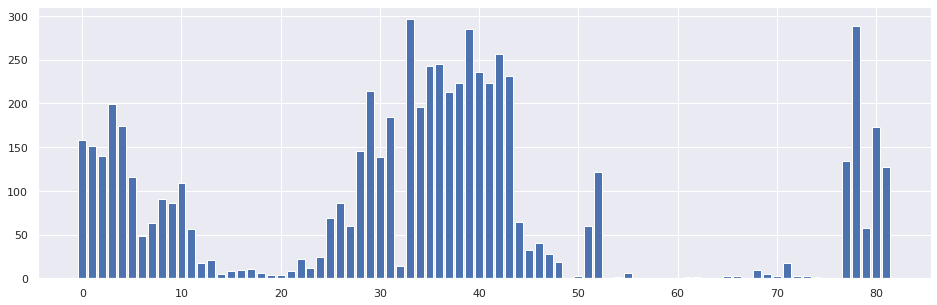

Feature 53: 0.132647


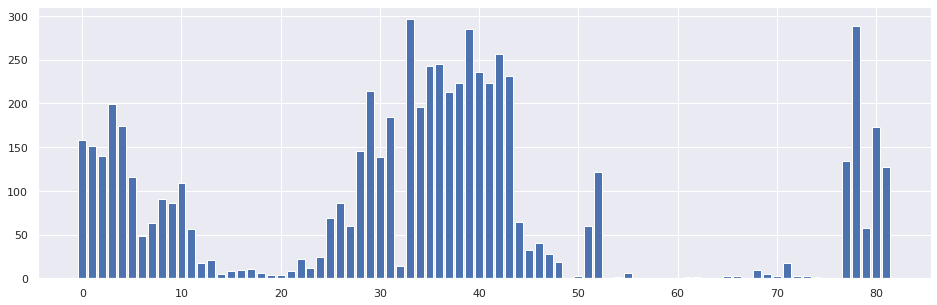

Feature 54: 1.101084


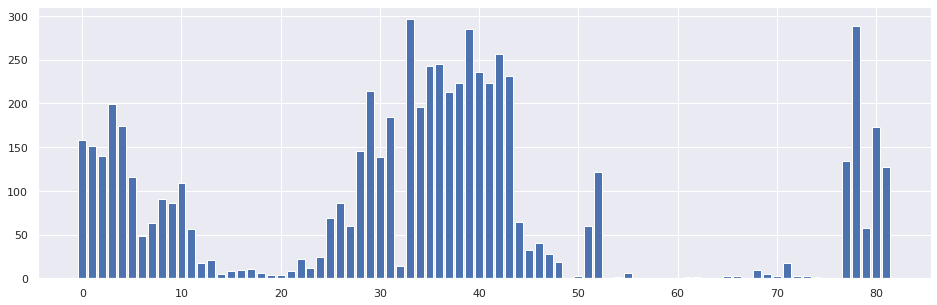

Feature 55: 6.577789


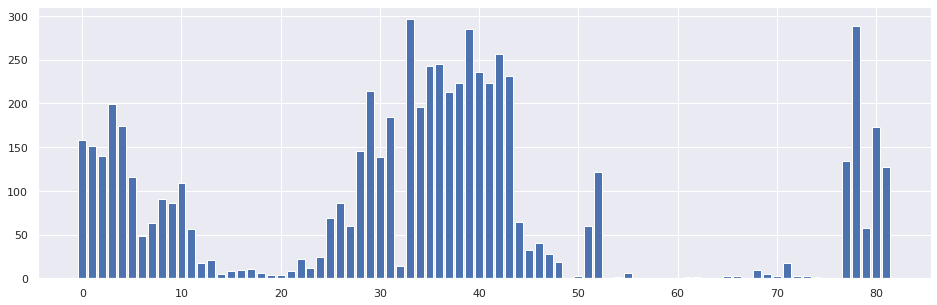

Feature 56: 0.063585


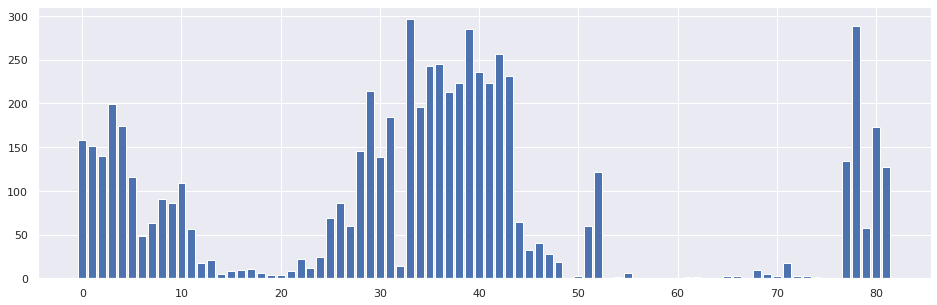

Feature 57: 0.063526


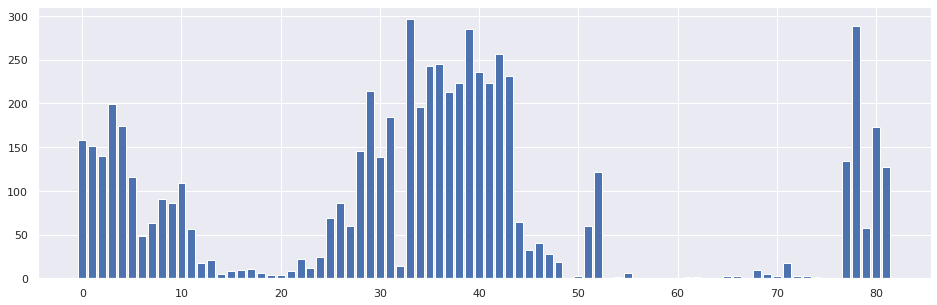

Feature 58: 0.274432


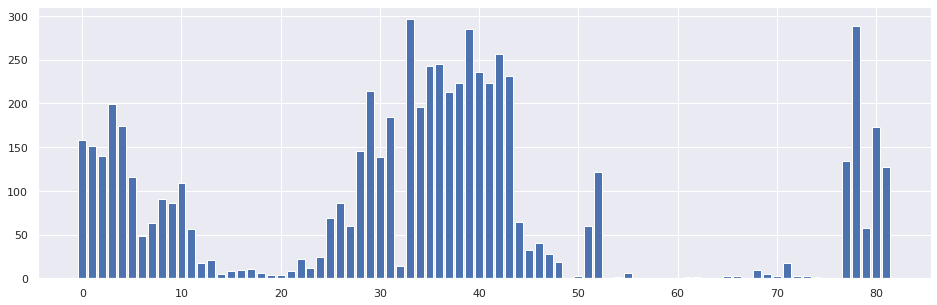

Feature 59: 0.649103


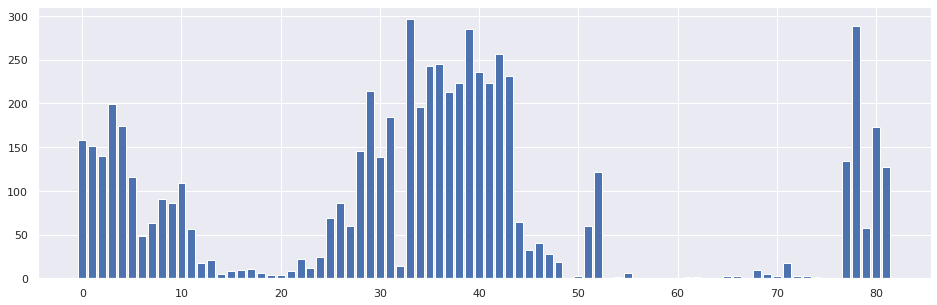

Feature 60: 0.677162


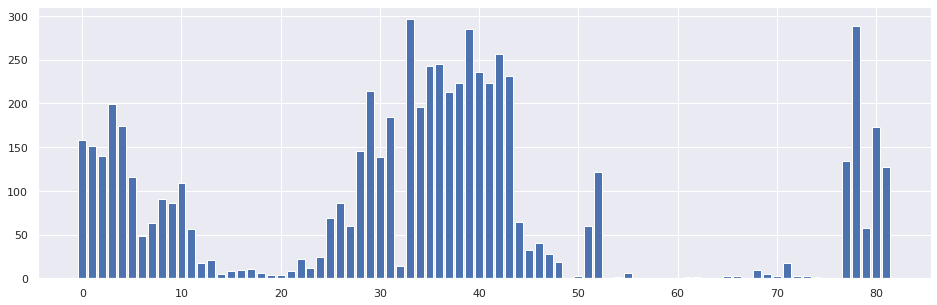

Feature 61: 0.941597


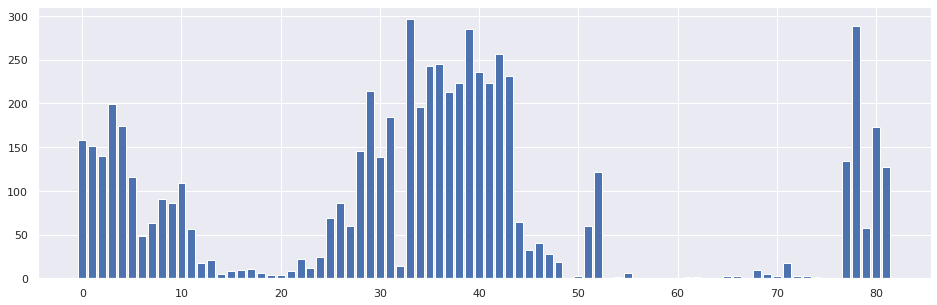

Feature 62: 1.966800


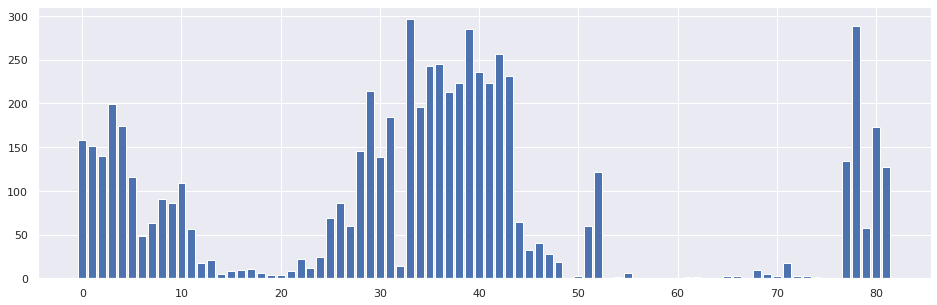

Feature 63: 0.236017


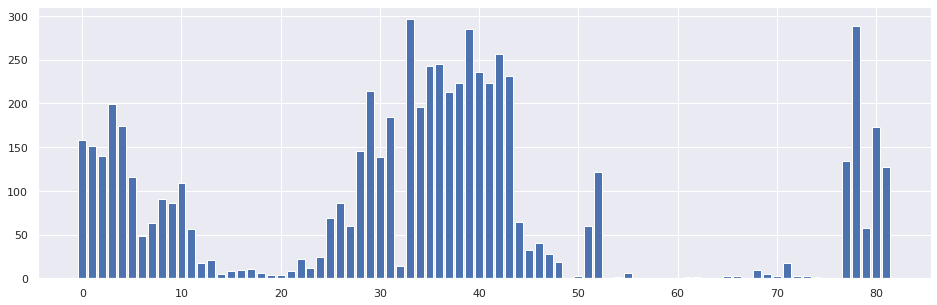

Feature 64: 0.019107


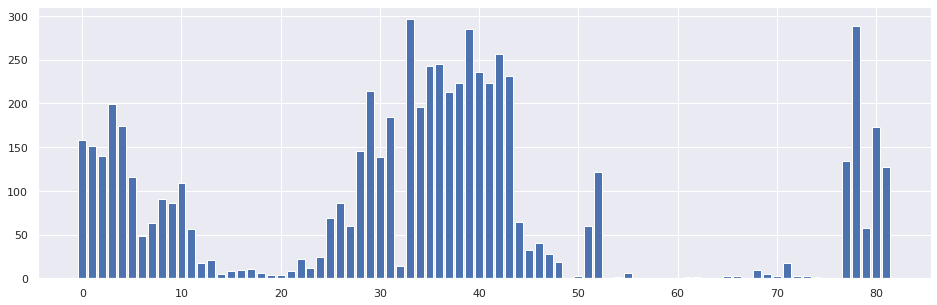

Feature 65: 2.735354


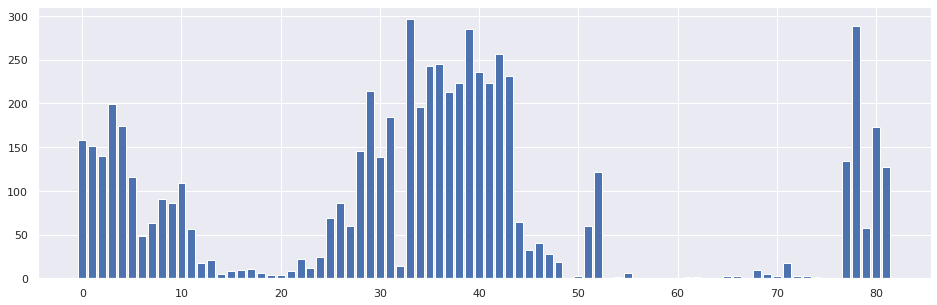

Feature 66: 3.050762


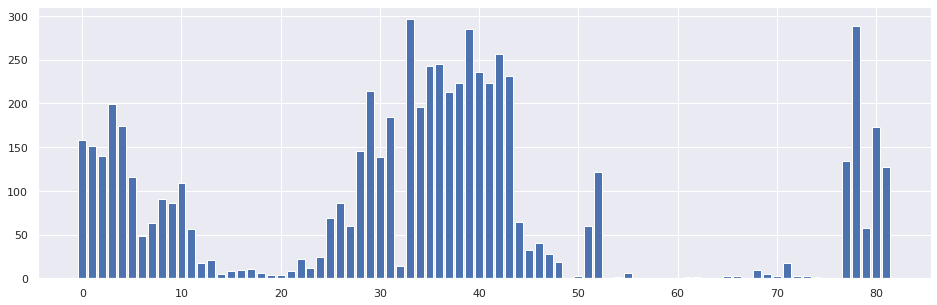

Feature 67: 0.032818


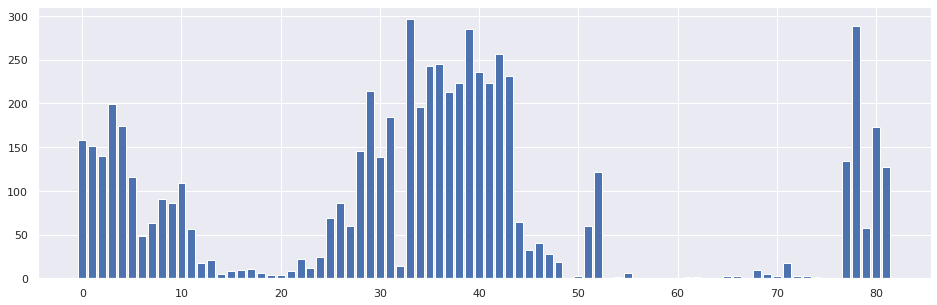

Feature 68: 9.063668


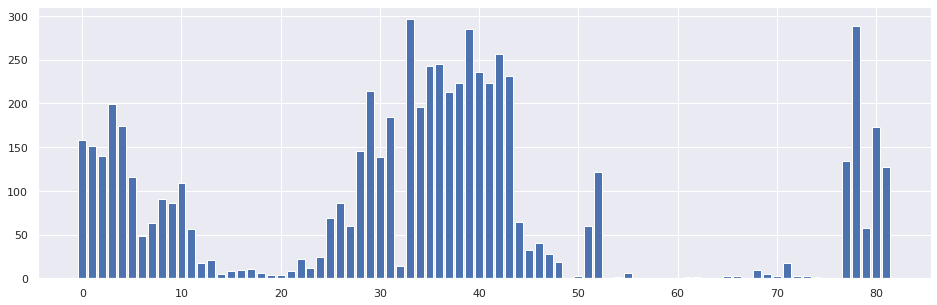

Feature 69: 5.002766


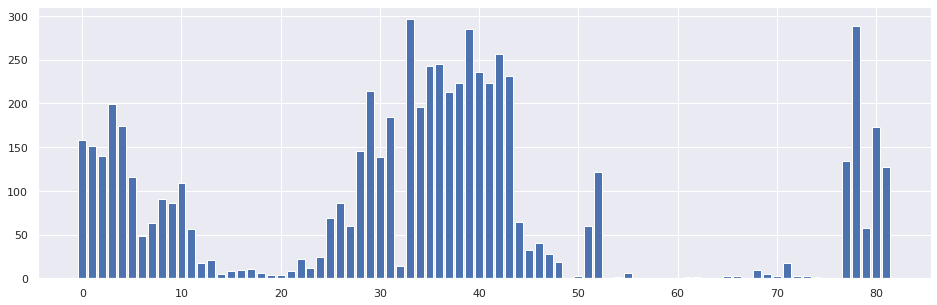

Feature 70: 2.334331


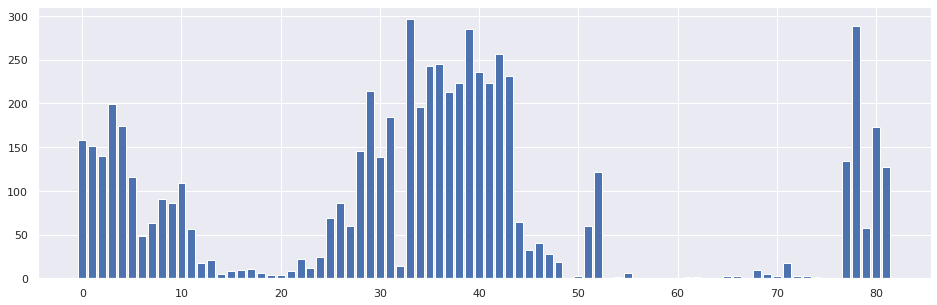

Feature 71: 17.814215


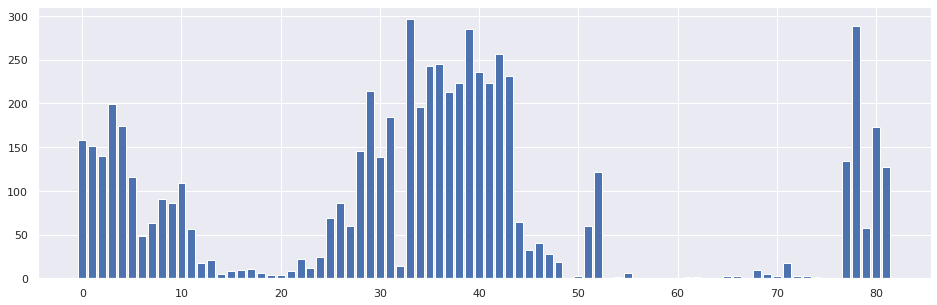

Feature 72: 2.398578


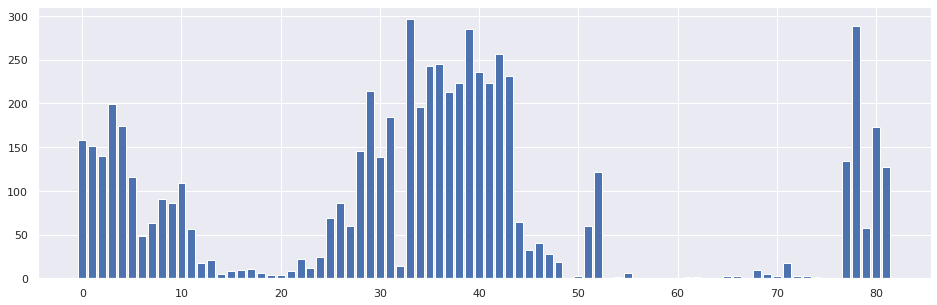

Feature 73: 2.532264


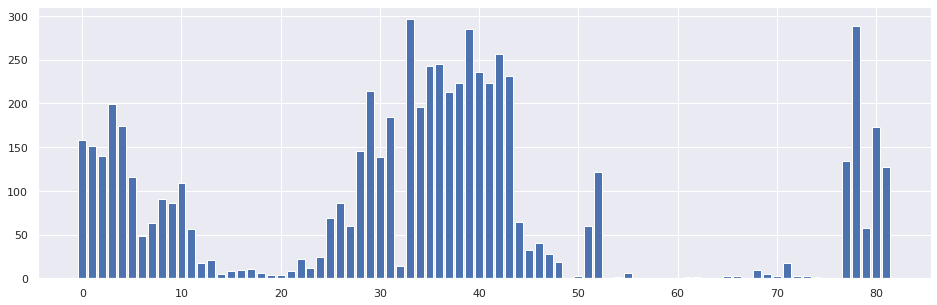

Feature 74: 1.518815


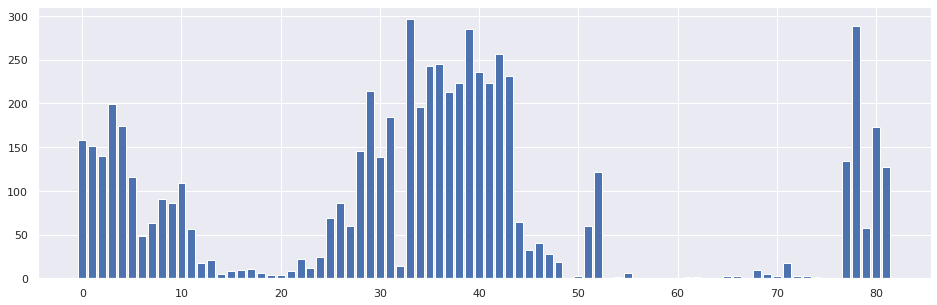

Feature 75: 0.000717


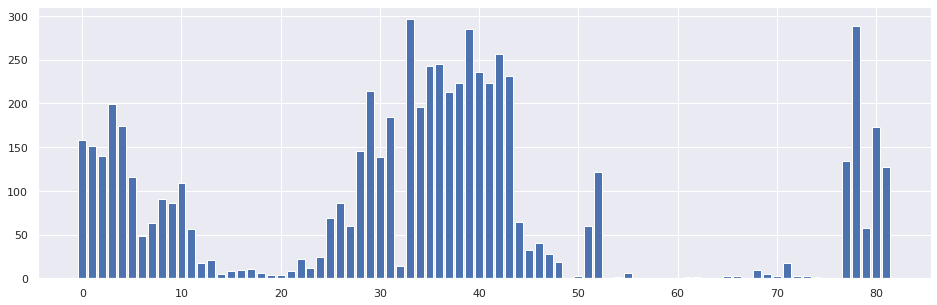

Feature 76: 0.562427


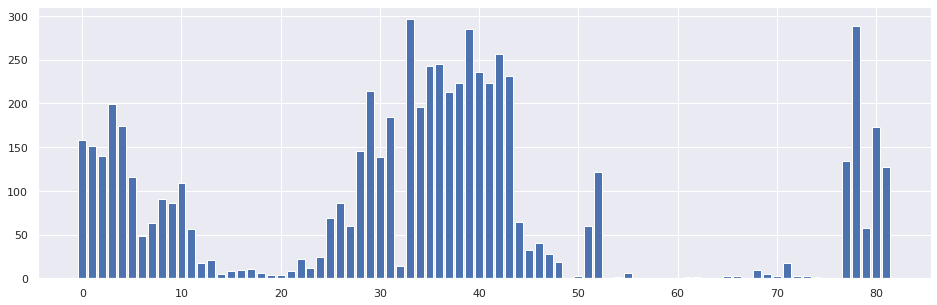

Feature 77: 134.458025


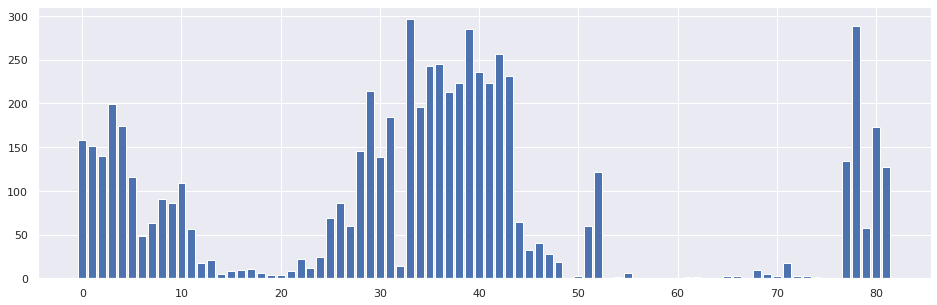

Feature 78: 287.854640


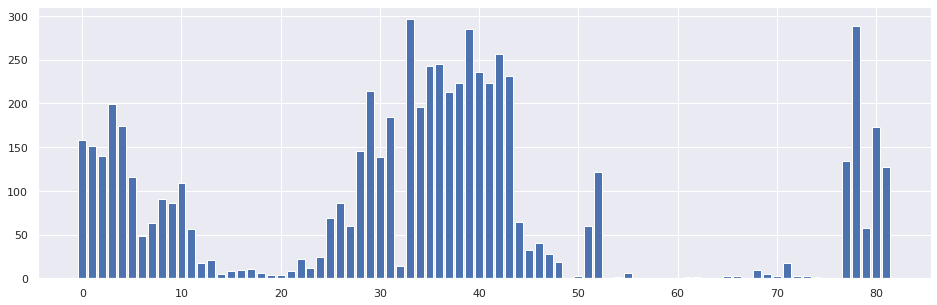

Feature 79: 58.053156


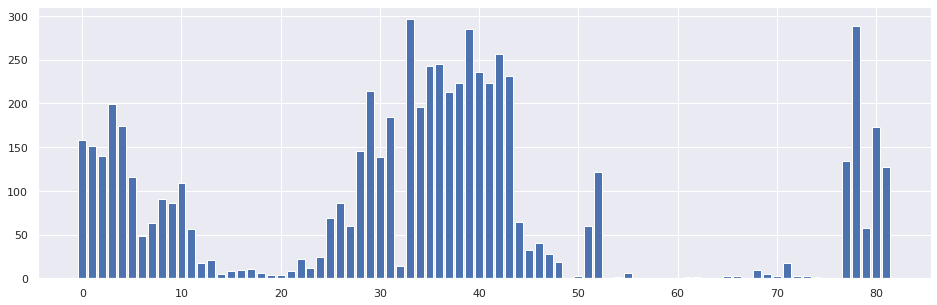

Feature 80: 173.305870


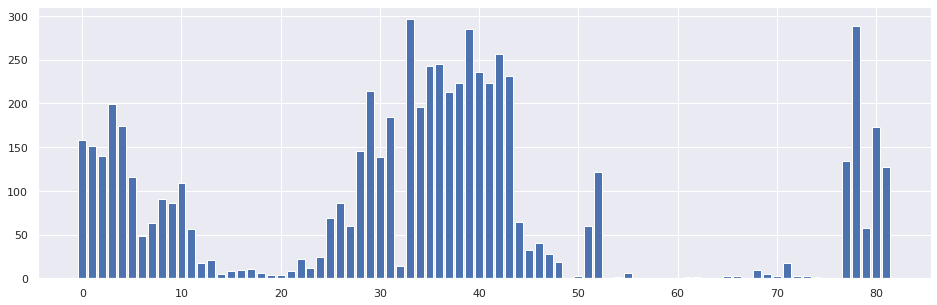

Feature 81: 127.569519


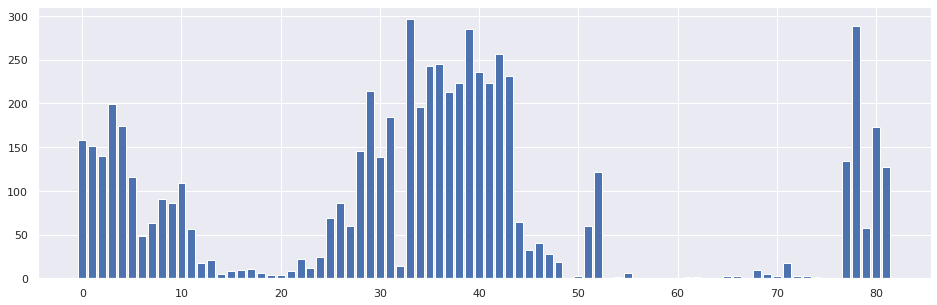

In [ ]:
    
for i in range(len(best_features.scores_)):
  print('Feature %d: %f' % (i, best_features.scores_[i]))
# plot the scores
  plt.bar([i for i in range(len(best_features.scores_))], best_features.scores_)
  plt.show()

Because the f_regression function indicates that roughly 30 features are dependable for our model, we might use k = 30 when configuring SelectKBest to select these top features. We begin by defining the random forest instance and specifying the number of trees.
The features are then automatically selected using the selectFromModel object from sklearn.

In [ ]:
#from sklearn.feature_selection import RFE
#from sklearn.ensemble import RandomForestRegressor 

r_selection = RFE(RandomForestRegressor(n_estimators=100 , random_state=0 , n_jobs=1), n_features_to_select=30)


In [ ]:
r_selection.fit(X_train , y_train)

To see which features are important we can use get_support method on the fitted model.
It will return a list of boolean values in an array. True for traits with a greater relevance than the average, and False for the remainder.

In [ ]:
#Best Selected features
best_train_features = X_train.columns[(r_selection.get_support())]
len(best_train_features)

In [ ]:
r_selection.get_support()

...We can now make a list and count the selected features.

30 features have been selected by the random forest, we will use them for our model

In [ ]:
print(best_train_features)

In [ ]:
#Estimators
r_selection.estimator_.feature_importances_

In [ ]:
best_features = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_wind_speed',
       'Barcelona_pressure', 'Bilbao_pressure', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Bilbao_weather_id', 'Valencia_humidity', 'Valencia_temp_min',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp_min', 'Year', 'Month', 'Day', 'Day_of_week', 'Start_hour']

In [ ]:
#work with the best features for the train data
X_best = df_train_scaled[best_features]
X_best.columns

In [ ]:
#for the test data work with the best features for the test data
X_best_test = df_test_scaled[best_features]
X_best_test.columns

##### 1. Our first model is LinearRegression, we are ready to train the model using the best features

In [ ]:
# create one or more ML models
# Train the model

from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
lr_model = LinearRegression().fit(X_train[best_features], y_train)
print (lr_model)

we have fit our x values into  the model and below we make a prediction for our y values

In [ ]:
y_predictions = lr_model.predict(X_test[best_features])
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(y_predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

#####  plot a regression line to see how well the model performs

In [ ]:
# evaluate one or more ML models
plt.scatter(y_test, y_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

... not quite a good fit..

#####  Evaluate the metrics for our model 

In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predictions)
print("MSE:", mse)

lr_rmse = np.sqrt(mse)
print("RMSE:", lr_rmse)

lr_r2 = r2_score(y_test, y_predictions)
print("R2:", lr_r2)

... Linear regressor has an r2 of 0.19 and an RMSE of 4751 which is high is a lower score and a higher RMSE.

##### 2 Our next model is Lasso

In [ ]:
#from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
lasso_model = Lasso().fit(X_train[best_features], y_train)
print (lasso_model, "\n")

# Evaluate the model using the test data
y_predictions = lasso_model.predict(X_test[best_features])
mse = mean_squared_error(y_test, y_predictions)
print("MSE:", mse)
lasso_rmse = np.sqrt(mse)
print("lasso_RMSE:", lasso_rmse)
lasso_r2 = r2_score(y_test, y_predictions)
print("lasso_R2:", lasso_r2)

# Plot predicted vs actual
plt.scatter(y_test, y_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

From the results, Lasso Model has an RMSE of around 4751 amd R2 of 0.18 hence not a good model.

##### As an alternative to a linear model, there's a category of algorithms for machine learning that uses a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a branch in a decision tree based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.  It's easiest to see how this works with an example.



##### 3. Let's train a Decision Tree regression model using the data. After training the model, the code below will print the model definition and a text representation of the tree it uses to predict label values.

... 
In this model we will train a regression tree to predict the load_shortfall_3h  using all the 82 available features.

In [ ]:
X1 = df_train_dummies.drop('load_shortfall_3h', axis = 1)
y1 = df_train_dummies['load_shortfall_3h']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [ ]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)
# Compute rmse_dt
dt_rmse = mse_dt **(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(dt_rmse))
print("Test set R2 of dt: {:.2f}".format(dt_r2))

Decision tree has an RMSE Of 4567.23- a bit high though- and an R2 of 0.24 -which is quite low 

##### How is the regression line

In [ ]:

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

... nothing linear about it

###### NB:
 However,Decision tree regressor has an improved r2 and RMSE compared to Lasso and Linear Regressor

##### 4. We will also try a Random Forest model, which applies an averaging function to multiple Decision Tree models for a better overall model.

In [ ]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train,y_train) 

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rf_rmse = MSE(y_test, y_pred) **(1/2)
rf_r2 = r2_score(y_test, y_pred)

# Print rmse_test
print('Test set RMSE of rf: {:.3f}'.format(rf_rmse))
print('Test set RMSE of rf: {:.3f}'.format(rf_r2))

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


That is quite a good improvement from our last models... An R2 of 0.721 and and RMSE of 2775.660, higher and lower respectively from our outher models. We also see an improved regression line that fits the data.

##### However, there is more to Random forest : Visualizing features importances. 
We will determine which features were the most predictive according to the random forests regressor rf that we trained 

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='bar', color='lightgreen')
plt.title('Features Importances')
plt.show()

Apparently, day,hour, month,day_of_week are the most important features according to rf. The importances of these five features add up to more than 75%!

#####  5. Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. We will have a look at Gradient Boosting.

In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Instantiate gb
gbr = GradientBoostingRegressor(max_depth=4, 
            n_estimators =200,
            random_state=2)

# Fit gb to the training set
gbr.fit(X_train, y_train)

# Predict test set labels
y_pred = gbr.predict(X_test)


# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
gbr_rmse = mse_test**(1/2)
gbr_r2 = r2_score(y_test, y_pred)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(gbr_rmse))
print('Test set RMSE of gb: {:.3f}'.format(gbr_r2))

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Our gradient boost model performs slightly better that the random forest a very significant improvement of 2747.436 rmse and 0.727 r2 from our rf of 2775.660 rmse and 0.721. A better regression line can also be seen.

##### The hyperparameters of a machine learning model are parameters that are not learned from data. They should be set prior to fitting the model to the training set.

##### 6. Let's try using a grid search approach to try combinations from a grid of possible values for the learning_rate and n_estimators hyperparameters of the Random forest regressor. 

In [ ]:
#define parameters
params_rf = {'n_estimators': [100,350,500],
                'max_features': ['log2', 'auto', 'sqrt'],
                'min_samples_leaf': [2,10,30]}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

In [ ]:
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
grid_rf_rmse = MSE(y_test, y_pred) **(1/2)
grid_rf_r2 = r2_score(y_test, y_pred)
# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(grid_rf_rmse)) 
print('Test RMSE of best model: {:.3f}'.format(grid_rf_r2)) 

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Using the grid search approach lowered our Random forest regressor to an RMSE of 2719 and increased our r2 to 0.732. And now we have our best model..
### the Random forest regressor with grid search approach is our best model so far

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### After trying out a 5 models with one that has been hyperparameter tuned and chosing the best model for our observation, we proceed to save the model using the pickle operation to serialize the machine learning algorithms and save the serialized format to a file.

In [ ]:
#saving the best perfoeming models

model_grid_rf_save_path = "grid_rf_model.pkl"
with open(model_grid_rf_save_path,'wb') as file:
    pickle.dump(grid_rf,file)

In [ ]:
model_grid_rf_load_path = "grid_rf_model.pkl"
with open(model_grid_rf_load_path,'rb') as file:
    unpickled_grid_rf_model = pickle.load(file)

In [ ]:
y_pred =  unpickled_grid_rf_model.predict(df_test_dummies)

#### The submission filehas to be a .csv with two colums(Time and the target column(load_shortfall_3h)) so we create a new dataframe containing the two and saved it with reference to the model of choice. i.e 'rfr_model_file.csv' for random forest regressor.

In [ ]:
df_grid_rf_new = pd.DataFrame(y_pred, columns=['load_shortfall_3h'])

In [ ]:
df_test_copy.head()

In [ ]:
output_grid_rf_df = pd.DataFrame({"time": df_test_copy['time'].reset_index(drop=True)})

In [ ]:
grid_rf_model_file = output_grid_rf_df.join(df_grid_rf_new)

In [ ]:
grid_rf_model_file['load_shortfall_3h'] = df_grid_rf_new.values

In [ ]:
grid_rf_model_file.to_csv("grid_rf_model_file.csv", index=False)

#### We print the file to have an overview of what the csv will look upon download to confirm our output. After confirmation and satisfaction, it is ready for submission in Kaggle. 

In [ ]:
print(grid_rf_model_file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance
print("lr_RMSE:{},     |     lr_R2:{}".format(lr_rmse,lr_r2))
print("lasso_RMSE:{},  |     lasso_R2:{}".format(lr_rmse,lr_r2))
print("dt_RMSE:{},     |     lr_R2:{}".format(dt_rmse,dt_r2))
print("rf_RMSE:{},     |     rf_R2:{}".format(rf_rmse,rf_r2))
print("gbr_RMSE:{},    |     gbr_R2:{}".format(gbr_rmse,gbr_r2))
print("grid_rf_RMSE:{},|     gbr_R2:{}".format(grid_rf_rmse,grid_rf_r2))





#### We tried a total of 5 models to select ou r best from and the results are as follows. (Ordered Descending)

##### 1. Random forest regressorwith grid search is the best performing model with an accuracy of about 73%(R2 = 0.73213). 

##### 2. The second best model is GradientBoostingRegressor It has an accuracy of about 72%(R2=0.72650)

##### 3. Random forest regressor with no tuning follows with an accuracy of about 72%(R2=0.72085)

##### 4. DecisionTreeRegressor performs poorly with an accuracy of about 24%(R2=0.24421)

##### 5. LASSO has a poor performance with an accuracy level of about 19%(R2=0.19)

##### 6.linear regression is the worst performing model with 


#### Random forest regressor is best because it has an R2 of 73%. What this means is that 73% of the data fits the model which is a good score as compared to the rest.

##### We used RMSE and r2 as our metrics for accuracy and having looked at the above models:


#### Because of its performance and accuracy in contrast to the other models, the Random forest regressor with grid search is our best model . The R2 for the Random Forest regressor is 0.7321, which is the highest of all the models. R2 is the squared correlation between the observed outcome values and the model's predicted values in Multiple Linear Regression. The quality of the model is defined by a high R2. I.e. The better the model, the better the R2.
#### The RMSE is 2719 which is the lowest of all the models. Root mean squared error (RMSE) is the square root of the mean of the square of all of the error. The performance of the model is defined by a low RMSE. the lower the RMSE the better the model's performance

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

#### The best performing model has an r_score(R2) of 0.7321, For a perfect model, the R2 should be 1. This could be negative or positive. So the closer our r_score is to 1 the more accurate our findings. It is thereby safe to say that our model accuracy is 73%. An r-squared of 73% reveals that 73% of the data fit the regression model. 

In [ ]:
# discuss chosen methods logic